---

<p align="center">
  <!---<img src="https://www.estudiaradistancia.com.ar/logos/original/logo-universidad-de-buenos-aires.webp" height=80 />--->
  <img src="https://confedi.org.ar/wp-content/uploads/2020/09/fiuba_logo.jpg" height="180"/>
</p>
<br>

---

<p align="center">
<font size="+3">
[75.06] Organizacion de Datos - Curso Rodriguez
Trabajo Práctico I
<br>
Análisis de propiedades en venta - Dataset Properati
Segundo Cuatrimestre - 2022
</font>
</p>
<br>

---

<p align="center">
<font size="+3">
GRUPO 3
</font>
<font size="+2">
INTEGRANTES
</font>
<font size="+1">
Ramiro Gestoso,  
Facundo Monpelat,
Paula Bruck,
Miguel Vasquez,
Gaston Avila
</font>

</p>

<br>
<br>

---

## Introducción 

En el presente Trabajo Practico se busca aplicar las siguientes técnicas:
- Análisis exploratorio.
- Preprocesamiento de datos.
- Agrupamiento (Clustering).
- Clasificación en base a entrenamiento y predicción.
- Uso y decisión de modelos para regresión.

Todo ello utilizando el conjunto de datos provisto por la empresa Properati correspondiente a anuncios de propiedades en venta de la República Argentina publicados durante el año 2021.

## Índice de contenidos

0. Imports y obtención de dataset
1. Análisis Exploratorio y Preprocesamiento de Datos
    a) Exploración Inicial.
    b) Datos Faltantes
    c) Valores atípicos
    d) Reducción de la dimensionalidad
2. Agrupamiento
3. Clasificación
    a) Construcción de variable target
    b) Entrenamiento y Predicción
     - Modelo 1 : Árbol de decisión
     - Modelo 2: Random Forest
     - Modelo 3: a elección
4. Regresión
    - Modelo 1: KNN
    - Modelo 2: XGBoost
    - Modelo 3: a elección
5. Conclusiones

## 0. Imports y obtención de dataset  

Sección con imports y definiciones auxiliares iniciales para manipulación general del dataset

In [1]:
!ls

df_preprocesado_v1.csv	properati_argentina_2021.csv


Importamos las bibliotecas a utilizar a lo largo de nuestro trabajo 

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy.stats as st

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

from matplotlib import patches

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None


Cargamos el dataset de properati

In [3]:
ds_original = pd.read_csv('properati_argentina_2021.csv')
ds_properati = ds_original.copy()

## 1. Análisis exploratorio y preprocesamiento de datos

### a) Exploración inicial

Se realiza un un acercamiento inicial general del dataset observando sus distintas caracteristivas principales

En principio se observa la cantidad de observaciones y features contenidas:

In [4]:
shape = ds_properati.shape
print("Filas: %d Columnas: %d" % (shape[0], shape[1]))

Filas: 460154 Columnas: 20


In [5]:
ds_properati.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


Obtenemos informacion relevante del dataset y sus columnas

In [6]:
ds_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

Clasificando las variables presentes en este dataset las dividiremos en :
- Cualitativas(categoricas):
    - Ordinales 
    - Nominales
- Cuantitativas(numericas):
    - Discretas (Sus modalidades son valores enteros. )
    - Continuas (Sus modalidades son valores reales. )

Las variables **cuantitativas** observadas a partir del dataset son:
- **latitud (continua)** 
- **longitud (continua)**
- **property_rooms (ordinal)**: Ambientes de la propiedad
- **property_bedrooms (ordinal)**: Habitaciones (dormitorios) de la propiedad
- **property_surface_total (continua)**: Superficie total que ocupa la propiedad
- **property_surface_covered (continua)**: Superficie de terreno que cubre la propiedad
- **property_price (continua)**: Precio de la propiedad
- **place_l6** (Más adelante se detalla, ya que esta columna se encuentra mal categorizada por su dtype)

A continuacion se muestran las medidas de resumen de las variables mencionadas:

In [7]:
variables_cuantitativas = [
    'latitud',
    'longitud',
    'property_rooms',
    'property_bedrooms',
    'property_surface_total',
    'property_surface_covered',
    'property_price'
    ]
ds_properati[variables_cuantitativas].describe()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,419740.000000,419740.000000,368498.000000,344113.000000,397813.000000,4.279160e+05,4.421530e+05
mean,-34.228570,-59.557066,3.278053,2.297960,420.601250,9.605005e+03,3.063273e+05
std,3.251509,2.905129,1.870832,1.673985,4026.380748,3.440367e+06,4.899613e+06
min,-54.832057,-103.219258,1.000000,-3.000000,-1.000000,-3.000000e+00,0.000000e+00
25%,-34.640132,-58.899343,2.000000,1.000000,50.000000,4.500000e+01,4.490000e+04
50%,-34.585122,-58.488309,3.000000,2.000000,90.000000,7.800000e+01,9.800000e+04
75%,-34.423414,-58.404876,4.000000,3.000000,210.000000,1.700000e+02,1.990000e+05
max,42.557773,-35.044991,40.000000,390.000000,200000.000000,2.147484e+09,1.500000e+09


En cuanto a variables **cualitativas**, se tienen:
- **start_date (ordinal)**: Fecha de alta del aviso
- **end_date (ordinal)**: Fecho de baja del aviso
- **created_on (ordinal)**: Fecha de alta de la primera versión del aviso
(Nota de las anteriores: si bien por defecto vienen en formato string, serán convertidos a tipo *date* posteriormente)
- **operation (nominal)**: Tipo de operación (Venta, Alquiler)
- **place_l2 (nominal)**: Nivel de division administrativa 2, correspondiente a provincia
- **place_l3 (nominal)**: Nivel de division administrativa 3, correspondiente a ciudad
- **place_l4 (nominal)**: Nivel de division administrativa 4, correspondiente a barrio
- **place_l5 (nominal)**: Nivel de division administrativa 5. No tiene una equivalencia definida por documentación.
- **property_type (nominal)**: Tipo de propiedad (Casa, Departamento, PH)
- **property_currency (nominal)**: Moneda correspondiente al precio publicado
- **property_title (nominal)**: Titulo del anuncio


### Filtramos las filas por aquellas que se ajusten a lo pedido en el enunciado

* property_type: Casa, PH o Departamento
* property_currency: USD
* operation: Venta
* place_l2 (provincia): Capital Federal

In [8]:
print('Property types')
print(ds_properati['property_type'].value_counts().index.tolist())
print('Property currencies')
print(ds_properati['property_currency'].value_counts().index.tolist())
print('Operations')
print(ds_properati['operation'].value_counts().index.tolist())
print('Provincies')
print(ds_properati['place_l2'].value_counts().index.tolist())

Property types
['Departamento', 'Casa', 'Lote', 'PH', 'Local comercial', 'Oficina', 'Otro', 'Cochera', 'Depósito', 'Casa de campo']
Property currencies
['USD', 'ARS', 'UYU', 'PEN', 'COP']
Operations
['Venta', 'Alquiler', 'Alquiler temporal']
Provincies
['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Oeste', 'Córdoba', 'Buenos Aires Costa Atlántica', 'Neuquén', 'Montevideo', 'Buenos Aires Interior', 'Maldonado', 'Mendoza', 'Río Negro', 'Tucumán', 'Colonia', 'Salta', 'Entre Ríos', 'San Juan', 'La Pampa', 'Canelones', 'Chubut', 'San Luis', 'Misiones', 'Florida', 'Jujuy', 'Corrientes', 'Michigan', 'Chaco', 'Rocha', 'Tierra Del Fuego', 'Santiago Del Estero', 'Santa Catarina', 'Santa Cruz', 'Rio Grande do Norte', 'Maryland', 'Catamarca', 'La Rioja', 'Miami', 'Rio de Janeiro', 'Pennsylvania', 'Formosa', 'California', 'São Paulo']


Analizando los valores que toman las variables que utilizaremos, podemos afirmar que no se excluyen valores que deban entrar en la categoría pensada.

Procedemos entonces a realizar un primer filtro del dataset:

In [9]:
property_type_cond = ds_properati['property_type'].isin(['Casa', 'PH','Departamento'])
property_currency_cond = ds_properati['property_currency']  == 'USD'
operation_cond = ds_properati['operation'] == 'Venta'
location_cond = ds_properati['place_l2'] == 'Capital Federal' # segun documentacion "place_l2" es la provincia

ds_properati = ds_properati[property_type_cond & property_currency_cond & operation_cond & location_cond]
ds_properati.reset_index(drop=True, inplace=True)
ds_properati.shape

(94249, 20)

In [10]:
ds_properati.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
3,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
4,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


Analizamos si existen filas duplicadas:

In [11]:
print(f'Cantidad de filas duplicadas: {ds_properati.duplicated().sum()}')

Cantidad de filas duplicadas: 0


Convertimos las fechas a tipo *date* para su utilización:

In [12]:
ds_properati['start_date'] = pd.to_datetime(ds_properati['start_date'], errors='coerce')
ds_properati['end_date'] = pd.to_datetime(ds_properati['end_date'], errors='coerce')
ds_properati['created_on'] = pd.to_datetime(ds_properati['created_on'], errors='coerce')

Verificamos que la conversion se haya realizado correctamente

In [13]:
ds_properati.dtypes.loc[['start_date', 'end_date', 'created_on']]

start_date    datetime64[ns]
end_date      datetime64[ns]
created_on    datetime64[ns]
dtype: object

### Variables irrelevantes

Considerando que la única utilidad que tiene la columna ID, para nuestro caso de estudio, es para el uso del archivo de descripciones, la consideramos irrelevante. A su vez tambien podemos agregar, dentro de esta categoria, a "place_l5" y "place_l6" que tienen todos, o casi todos sus datos incompletos, adicionado a que, según el contexto del problema, se trata de niveles de división territorial administrativa de los cuales no se brinda información en la documentación del dataset.

In [14]:
ds_properati.drop(['id', 'place_l5', 'place_l6'], axis=1, inplace = True)

### Gráficos de variables

Graficamos algunas variables cualitativas que creemos que se pueden interpretar bien mediante graficos

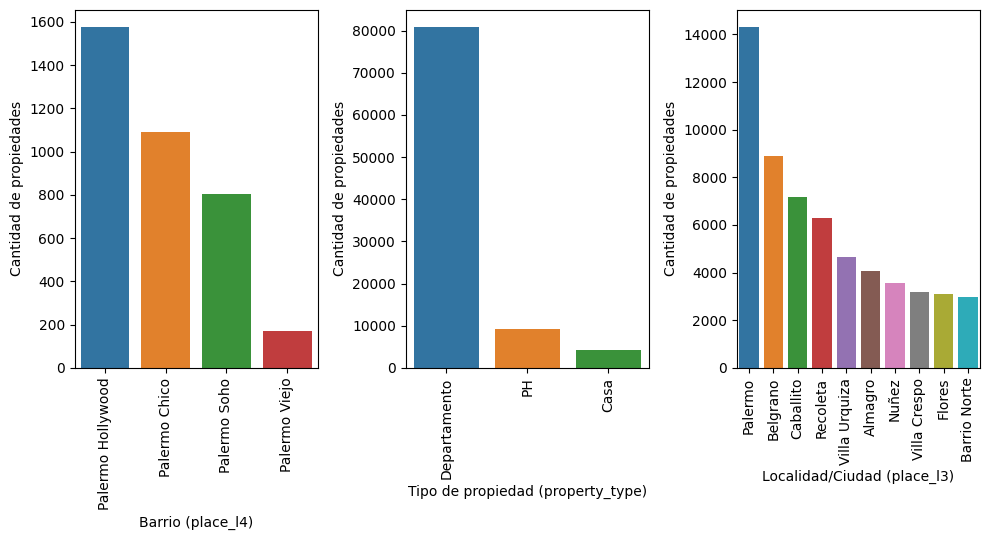

In [15]:
#Grafico boxplots 

plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,3)

ciudades = ds_properati['place_l3'].value_counts().head(10)
sns.barplot(x=ciudades.index, y=ciudades.values).set(xlabel='Localidad/Ciudad (place_l3)', ylabel='Cantidad de propiedades')
plt.sca(ax[0])
plt.xticks(rotation=90)
  
barrios = ds_properati['place_l4'].value_counts().head(10)
sns.barplot(x=barrios.index, y=barrios.values).set(xlabel='Barrio (place_l4)', ylabel='Cantidad de propiedades')
plt.sca(ax[1])
plt.xticks(rotation=90)

types = ds_properati['property_type'].value_counts()
sns.barplot(x=types.index, y=types.values).set(xlabel='Tipo de propiedad (property_type)', ylabel='Cantidad de propiedades')
plt.sca(ax[2])
plt.xticks(rotation=90)

plt.show()

Graficamos las variables cuantitavias

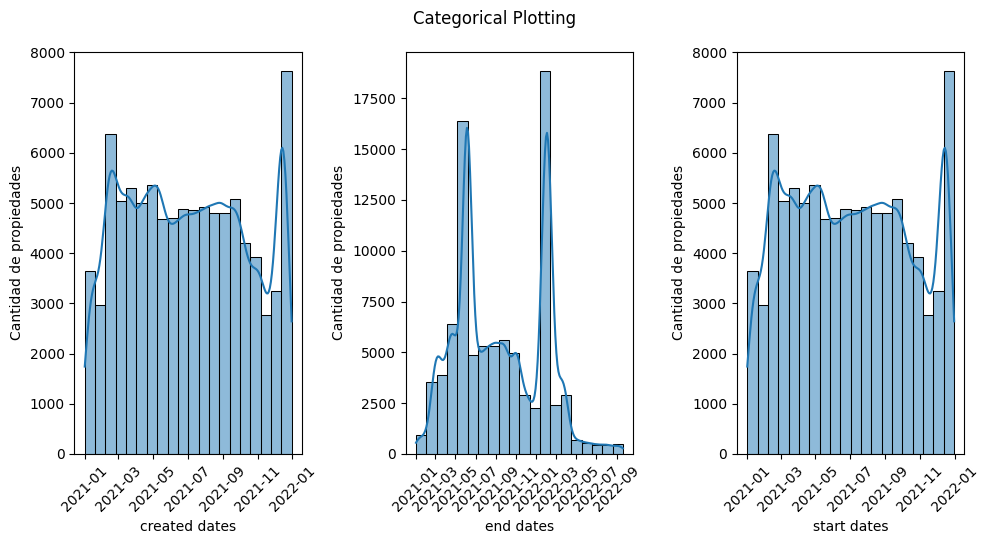

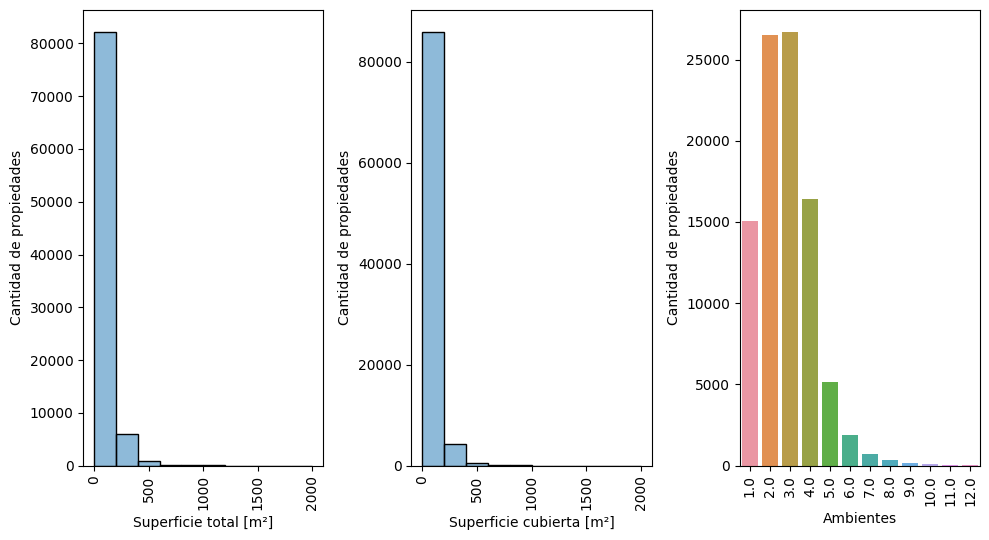

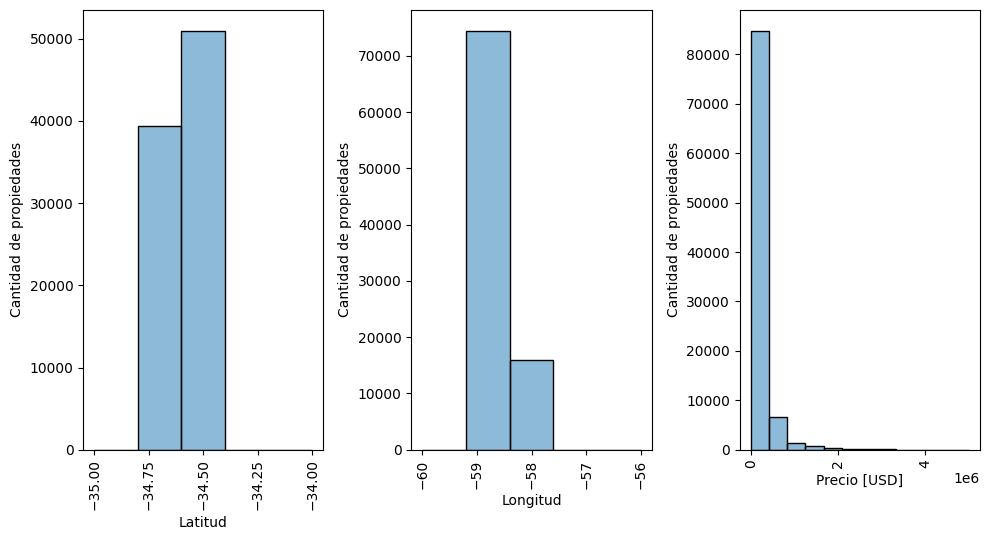

In [16]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Categorical Plotting')

sns_hist=sns.histplot(bins=20, data=ds_properati['start_date'], kde=True, alpha = 0.5).set(xlabel="start dates",ylabel="Cantidad de propiedades")
plt.sca(ax[0])
plt.xticks(rotation=45)

sns_hist=sns.histplot(bins=20, data=ds_properati['created_on'], kde=True, alpha = 0.5).set(xlabel="created dates",ylabel="Cantidad de propiedades")
plt.sca(ax[1])
plt.xticks(rotation=45)

sns_hist=sns.histplot(bins=20, data=ds_properati['end_date'], kde=True, alpha = 0.5).set(xlabel="end dates",ylabel="Cantidad de propiedades")
plt.sca(ax[2])
plt.xticks(rotation=45)
fig.show()

fig, ax = plt.subplots(1,3)

rooms=ds_properati['property_rooms'].value_counts().head(12)
sns.barplot(x=rooms.index, y=rooms.values)
plt.xlabel("Ambientes")
plt.ylabel("Cantidad de propiedades")
plt.sca(ax[0])
plt.xticks(rotation=90)

sns_hist=sns.histplot(bins=10, binrange=(0,2e3), data=ds_properati['property_surface_total'], alpha=0.5).set(xlabel="Superficie total [m²]",ylabel="Cantidad de propiedades")
plt.sca(ax[1])
plt.xticks(rotation=90)

sns_hist=sns.histplot(bins=10, binrange=(0,2e3), data=ds_properati['property_surface_covered'], alpha=0.5).set(xlabel="Superficie cubierta [m²]",ylabel="Cantidad de propiedades")
plt.sca(ax[2])
plt.xticks(rotation=90)
fig.show()


fig, ax = plt.subplots(1,3)
sns_hist=sns.histplot(bins=12, binrange=(0,5e6), data=ds_properati['property_price'], alpha=0.5).set(xlabel="Precio [USD]",ylabel="Cantidad de propiedades")
plt.sca(ax[0])
plt.xticks(rotation=90)

sns_hist=sns.histplot(bins=5, binrange=(-35,-34), data=ds_properati['latitud'], alpha=0.5).set(xlabel="Latitud",ylabel="Cantidad de propiedades")
plt.sca(ax[1])
plt.xticks(rotation=90)

sns_hist=sns.histplot(bins=5, binrange=(-60,-56), data=ds_properati['longitud'], alpha=0.5).set(xlabel="Longitud",ylabel="Cantidad de propiedades")
plt.sca(ax[2])
plt.xticks(rotation=90)
fig.show()


## Analisis de correlacion de variables

<AxesSubplot:>

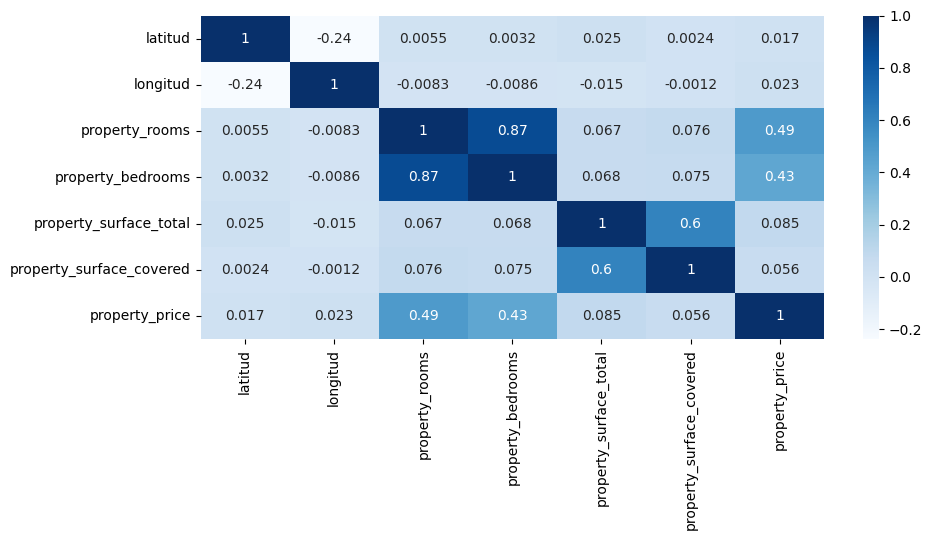

In [17]:
sns.heatmap(data=ds_properati.corr(), annot=True, cmap='Blues')

### Pares de variables con correlacion considerable:

* property_rooms & property_bedrooms -> correlacion positiva

* property_surface_covered & property_surface_total -> correlacion positiva

* property_rooms & property_price -> correlacion positiva

* property_bedrooms & property_price -> correlacion positiva

En todos tiene sentido que exista una correlacion. La cantidad de 'bedrooms' siempre va a estar limitada superiormente por la cantidad de 'rooms'. Algo parecido sucede con la superficie cubierta sobre la superficie total. Nunca se prodrá cubrir mas que el total. Tambien asi, los precios de las propiedades van a estar determinados, en parte, por la cantidad de ambientes (teniendo en cuenta habitaciones).

Estas condiciones explican la razon de la correlación y por qué tienen sentido.

Sin embargo, mirando los graficos de dispersion, podemos observar que algunas de estas "reglas" no se cumplen, lo que conduce a posibles valores atipicos, ya que no tienen sentido (aquellos puntos que estén por encima de la recta verde). Por ejemplo, en el segundo grafico podemos ver que hay casos de superficie cubierta mayor a la superficie total, lo cual no tiene sentido. Algo parecido pasa con el primer grafico.

Todos estos aspectos se analizarán en la sección de valores atipicos.

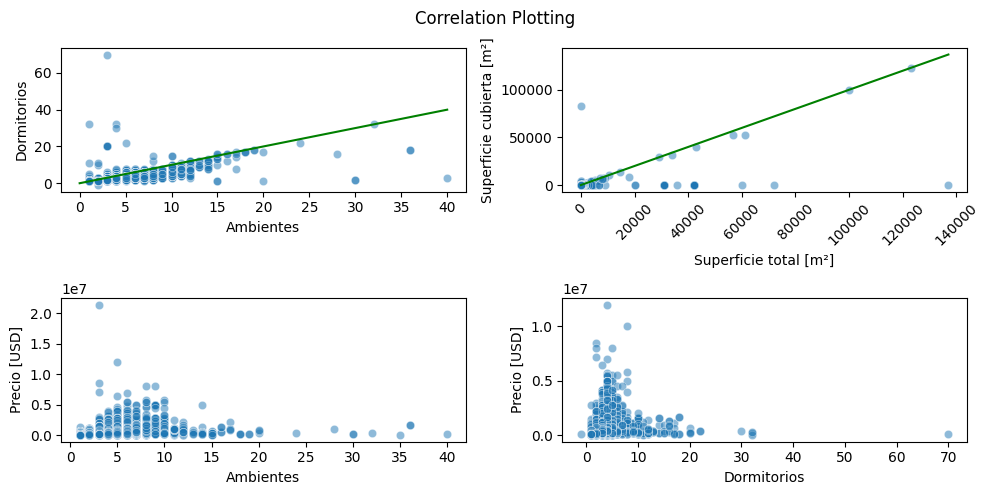

In [18]:
correlacion1 = ds_properati[['property_rooms', 'property_bedrooms']]
max_rooms = correlacion1['property_rooms'].max()

correlacion2 = ds_properati[['property_surface_covered', 'property_surface_total']]
max_surface_total = correlacion2['property_surface_total'].max()

correlacion3 = ds_properati[['property_rooms','property_price']]
correlacion4 = ds_properati[['property_bedrooms','property_price']]

fig, ax = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle('Correlation Plotting')

sns.scatterplot(x='property_rooms', y='property_bedrooms',data=correlacion1, alpha=0.5, ax = ax[0][0]).set(xlabel='Ambientes', ylabel='Dormitorios')
sns.lineplot(x=[0,max_rooms], y=[0,max_rooms], c='Green', ax = ax[0][0])

sns.scatterplot(x='property_surface_total', y='property_surface_covered',data=correlacion2, alpha=0.5, ax = ax[0][1]).set(xlabel='Superficie total [m²]', ylabel='Superficie cubierta [m²]')
sns.lineplot(x=[0,max_surface_total], y=[0,max_surface_total], c='Green', ax = ax[0][1])
ax[0][1].tick_params(axis='x', rotation=45)

sns.scatterplot(x='property_rooms', y='property_price',data=correlacion3, alpha=0.5, ax = ax[1][0]).set(xlabel='Ambientes', ylabel='Precio [USD]')

sns.scatterplot(x='property_bedrooms', y='property_price',data=correlacion4, alpha=0.5, ax = ax[1][1]).set(xlabel='Dormitorios', ylabel='Precio [USD]')

fig.tight_layout()


### b) Datos faltantes

#### Observaciones generales

Calculamos el porcentaje de datos nulos por columna.

In [19]:
nullable_percentages = (ds_properati.isnull().sum() / ds_properati.shape[0]) * 100
print(nullable_percentages)

start_date                   0.000000
end_date                     5.348598
created_on                   0.000000
latitud                      3.957602
longitud                     3.957602
place_l2                     0.000000
place_l3                     0.442445
place_l4                    96.134707
operation                    0.000000
property_type                0.000000
property_rooms               1.107704
property_bedrooms           11.657418
property_surface_total       5.139577
property_surface_covered     3.558658
property_price               0.000000
property_currency            0.000000
property_title               0.000000
dtype: float64


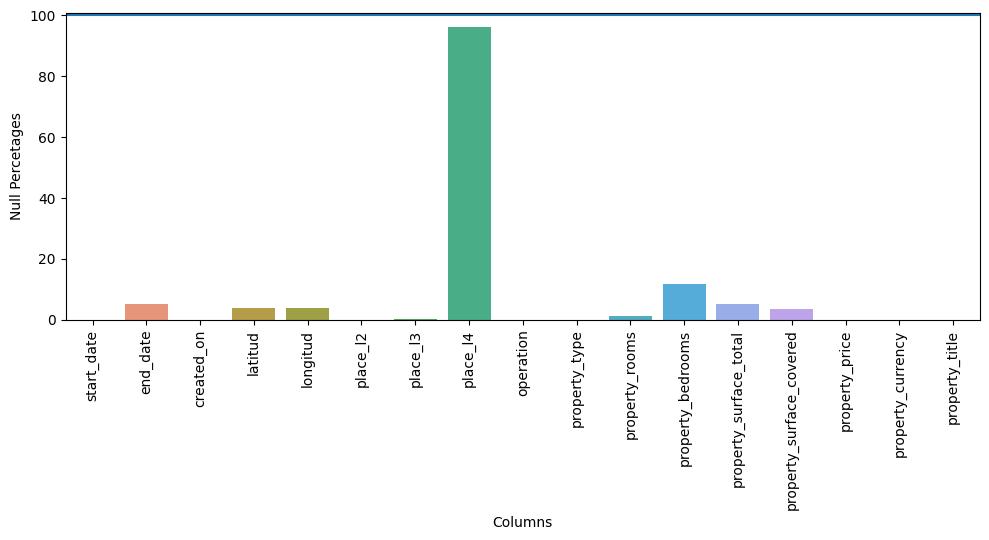

In [20]:
nullable_percentages = (ds_properati.isnull().sum() / ds_properati.shape[0]) * 100

graph = sns.barplot(x=nullable_percentages.index, y=nullable_percentages.values)
graph.axhline(100)
plt.xticks(rotation=90)
plt.ylabel("Null Percetages")
plt.xlabel("Columns")
plt.tight_layout()

Podemos observar que la columna place_l4 tiene un porcentaje de nulos de 96.134707% siendo de todas las columnas la que mayor cantidad de nulos posee. Por esto consideramos que no es relevante para nuestro analisis y procederemos a eliminarla.

In [21]:
ds_properati.drop(['place_l4'], axis=1, inplace = True)

Comprobamos que se haya eliminado correctamente

In [22]:
ds_properati.head()

,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
3,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
4,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


In [23]:
print(ds_properati['start_date'].equals(ds_properati['created_on']))

True


- Podemos ver que las columnas start_Date y end_date son exactamente iguales por ende podemos quedarnos con una sola de ellas

In [24]:
ds_properati.drop(['created_on'], axis=1, inplace = True)

In [25]:
ds_properati.head()

,start_date,end_date,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,2021-09-09,2021-09-26,NaN,NaN,Capital Federal,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,2021-09-09,2021-09-26,-34.637319,-58.361124,Capital Federal,Boca,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,2021-09-09,2021-09-28,-34.628647,-58.361871,Capital Federal,Boca,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
3,2021-09-09,2022-01-05,-34.610027,-58.401934,Capital Federal,Once,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
4,2021-09-09,2022-03-09,-34.631621,-58.416825,Capital Federal,Boedo,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


In [26]:
# Guardamos el dataset sin l4, l5,l6 , created on , ID
ds_properati.to_csv('df_preprocesado_v1.csv', index=False)

Calculamos el porcentaje de datos nulos por fila.

In [27]:
ds=ds_properati.isna().copy()

- Aqui podemos observar cuantos valores nulos tiene cada fila.(True== Nan)

In [28]:
ds.head(10)

,start_date,end_date,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
print("La cantidad de filas que contiene valores nulos son :",ds_properati.isnull().any(axis=1).sum())
nullrowspercentage= (ds_properati.isnull().any(axis=1).sum() / ds_properati.shape[0]) * 100
print("El porcentaje de filas nulas que tiene el dataset es de ",nullrowspercentage,"%")
nullquantityperrow=(ds_properati.isnull().sum(axis=1)).sort_values(ascending=False).value_counts()
print("\n La cantidad de registros que tienen una misma cantidad de nulos \n",nullquantityperrow)
nullperrow= ds_properati.isnull().sum(axis=1) / ds_properati.columns.size * 100
print("\n El porcentaje de nulos por cada fila es \n",nullperrow)
nullsortedpercentages= (ds_properati.isnull().sum(axis=1) / ds_properati.columns.size * 100).sort_values(ascending=False).value_counts()
print("\n La cantidad de filas que se tienen un mismo porcentaje \n",nullsortedpercentages)

La cantidad de filas que contiene valores nulos son : 24699
El porcentaje de filas nulas que tiene el dataset es de  26.206113592717163 %

 La cantidad de registros que tienen una misma cantidad de nulos 
 0    69550
1    18101
2     5145
3     1171
4      170
5      110
6        1
7        1
dtype: int64

 El porcentaje de nulos por cada fila es 
 0        20.000000
1         0.000000
2         0.000000
3         6.666667
4         6.666667
           ...    
94244     0.000000
94245     0.000000
94246     0.000000
94247     0.000000
94248     0.000000
Length: 94249, dtype: float64

 La cantidad de filas que se tienen un mismo porcentaje 
 0.000000     69550
6.666667     18101
13.333333     5145
20.000000     1171
26.666667      170
33.333333      110
46.666667        1
40.000000        1
dtype: int64


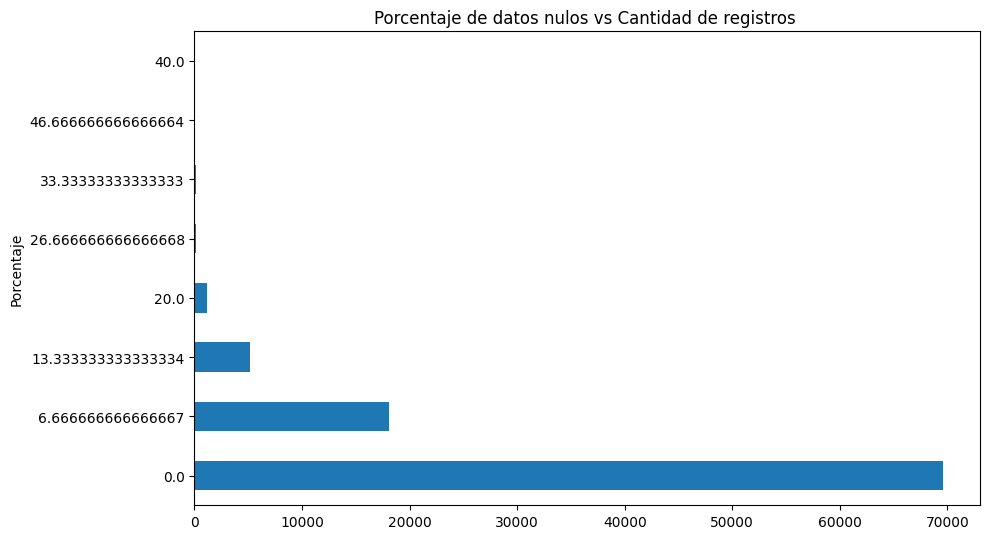

<Figure size 1500x1000 with 0 Axes>

In [30]:
nullsortedpercentages.plot(kind = "barh", title="Porcentaje de datos nulos vs Cantidad de registros ", ylabel="Cantidad de registros",xlabel="Porcentaje")
plt.figure(figsize=(15, 10))
plt.show()

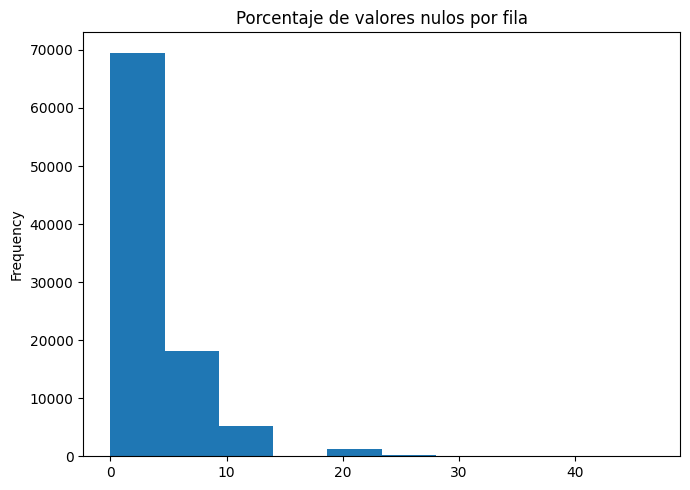

In [31]:
plt.figure(figsize=(7, 5))

nullperrow.sort_values(inplace=True)
nullperrow.plot.hist(bins=10, xlabel='Porcentaje de valores nulos', ylabel='Cantidad de filas', title='Porcentaje de valores nulos por fila')

plt.show()


A partir de la información observada se tomarán criterios a continuación

#### Tratamiento de datos faltantes
En lo que sigue se aplicarán los siguientes criterios generales decididos, teniendo en cuenta los objetivos del trabajo:
- Si una observación posee 3 features con valores faltantes y dos de ellas son latitud y longitud, se elimina la misma. Esto dado a que posteriormente la ubicación precisa de cada propiedad va a ser requerida
- Si una observación posee mas de 4 features con valores faltantes, se tiene información muy escasa de la misma, por lo tanto se elimina.
- Consideramos que la feature end_date no es indispensable para los efectos del análisis que se quiere realizar, por lo tanto procedemos a eliminar dichas filas
- En el caso de place_l3 al ser solo 240 filas las que tienen nan procedemos a eliminarlas.

- Se realiza imputación de datos sobre valores nulos en las siguientes features (detalles más adelante):
    - property_room y property_bedroom
    - property_surface_total y property_surface_covered 


Procedemos a eliminar las filas que tienen valores nulos en las columnas de longitud y latitud ya que no existe una tecnica que nos permita recuperar o predecir con exactitud estos valores, y son necesarios posteriormente.

In [32]:
ds_properati = ds_properati.dropna(subset=['latitud', 'longitud'])

In [33]:
ds_properati.isnull().sum(axis=1)
ds_properati.isnull().sum(axis=1).sort_values(ascending=False).value_counts()

0    69550
1    18101
2     2529
3      319
4       20
dtype: int64

Procedemos a eliminar todas las filas que tengan 4 valores nulos .

In [34]:
ds_properati = ds_properati.dropna(thresh=len(ds_properati.columns)-3)


In [35]:
ds_properati.isnull().sum(axis=1).sort_values(ascending=False).value_counts()

0    69550
1    18101
2     2529
3      319
dtype: int64

In [36]:
ds_properati.isnull().sum()

start_date                      0
end_date                     4755
latitud                         0
longitud                        0
place_l2                        0
place_l3                      240
operation                       0
property_type                   0
property_rooms                905
property_bedrooms           10473
property_surface_total       4564
property_surface_covered     3179
property_price                  0
property_currency               0
property_title                  0
dtype: int64

Procedemos a eliminar las filas que tienen valor nulo en place_l3 y en end_date

In [37]:
ds_properati = ds_properati.dropna(subset=['place_l3'])
ds_properati = ds_properati.dropna(subset=['end_date'])

## [MIGUEL] NOTA^:
Ver si se puede imputar el barrio (place_l3) a partir de latitud y longitud como vimos en clase.
Creo que muy seguramente quieren que lo hagamos porque en clase dijeron que le prestaramos atencion a ese ejemplo que justo
usaba nuestro mismo dataset (clase teorica) 

In [38]:
ds_properati.isnull().sum()

start_date                     0
end_date                       0
latitud                        0
longitud                       0
place_l2                       0
place_l3                       0
operation                      0
property_type                  0
property_rooms               771
property_bedrooms           9570
property_surface_total      4177
property_surface_covered    2904
property_price                 0
property_currency              0
property_title                 0
dtype: int64

Proseguimos realizando imputación por regresión entre las siguientes columnas:

- Ambientes y Dormitorios
- Superficie total y Superficie cubierta

Esto dado que las mismas tienen un grado alto de correlación entre sí. 

In [39]:
columnas_a_imputar=['property_rooms','property_bedrooms']
df_con_nans_en_rooms_y_bedrooms = ds_properati[columnas_a_imputar].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0) 

array_con_values_tras_imputar_rooms = imp.fit_transform(df_con_nans_en_rooms_y_bedrooms)

df_sin_nans_en_rooms_y_bedrooms = pd.DataFrame(array_con_values_tras_imputar_rooms)
df_sin_nans_en_rooms_y_bedrooms.rename(columns={0:"property_rooms", 1:"property_bedrooms"}, inplace=True)

ds_properati['property_rooms'] = df_sin_nans_en_rooms_y_bedrooms['property_rooms'].values
ds_properati['property_bedrooms'] =  df_sin_nans_en_rooms_y_bedrooms['property_bedrooms'].values

- Una vez imputados los datos corroboramos que no hayan quedado nulos para rooms y bedrooms

In [40]:
ds_properati.isna().sum()

start_date                     0
end_date                       0
latitud                        0
longitud                       0
place_l2                       0
place_l3                       0
operation                      0
property_type                  0
property_rooms                 0
property_bedrooms              0
property_surface_total      4177
property_surface_covered    2904
property_price                 0
property_currency              0
property_title                 0
dtype: int64

In [41]:
columnas_a_imputar=['property_surface_total','property_surface_covered']
df_con_nans_en_surfaces = ds_properati[columnas_a_imputar].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0) 

array_con_values_tras_imputar_surfaces = imp.fit_transform(df_con_nans_en_surfaces)

df_sin_nans_en_surfaces = pd.DataFrame(array_con_values_tras_imputar_surfaces)
df_sin_nans_en_surfaces.rename(columns={0:"property_surface_total", 1:"property_surface_covered"}, inplace=True)

ds_properati['property_surface_total'] = df_sin_nans_en_surfaces['property_surface_total'].values
ds_properati['property_surface_covered'] =  df_sin_nans_en_surfaces['property_surface_covered'].values

- Una vez imputados los datos corroboramos que no hayan quedado nulos

In [42]:
ds_properati.isna().sum()

start_date                  0
end_date                    0
latitud                     0
longitud                    0
place_l2                    0
place_l3                    0
operation                   0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
property_currency           0
property_title              0
dtype: int64

### c) Valores atípicos

Para detectar valores atipicos se realizarán 2 tipos de analisis:
- El **primero** correspondiente a detección de outliers de forma **univariada**.
- El **segundo** correspondiente a detección de outliers de forma **multivariada**.

Procedemos con el **primer analisis** graficando distintas variables que consideramos que pueden empezar siendo analizadas de forma **univariada**.

Entre ellas utilizando:
- La cantidad de ambientes, dormitorios, superficie total y superficie cubierta de las propiedades (distinguidos segun tipo de propiedad) [Boxplots]. 
- El precio de las propiedades (distinguidos segun tipo de propiedad) [Boxplots y Z-score]

Comenzamos creando una copia del dataset donde iremos revisando los outliers.

In [43]:
df_preprocesado = ds_properati.copy()

#### Analisis con la cantidad de ambientes

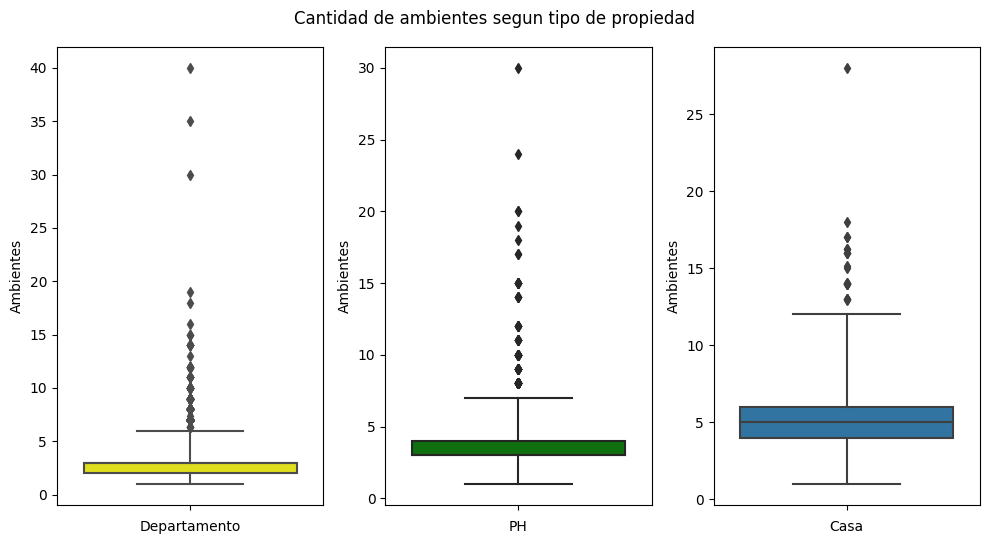

In [44]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Cantidad de ambientes segun tipo de propiedad')

properties_with_house_type_cond = df_preprocesado['property_type']  == 'Casa'
sns.boxplot(y='property_rooms',data=df_preprocesado[properties_with_house_type_cond], whis=3).set(xlabel='Casa', ylabel='Ambientes')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = df_preprocesado['property_type']  == 'Departamento'
sns.boxplot(y='property_rooms',data=df_preprocesado[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento', ylabel='Ambientes')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = df_preprocesado['property_type']  == 'PH'
sns.boxplot(y='property_rooms',data=df_preprocesado[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH', ylabel='Ambientes')
plt.sca(ax[2])
plt.xticks(rotation=45)

fig.show()


Observamos que para las propiedades de tipo casa hay varios outliers con cantidad de ambientes entre 13 (aprox) a 20 y un valor excepcional de una casa con 27 ambientes (aprox). 

Tambien observamos para las propiedades de tipo departamento que hay varios outliers con cantidad de ambientes entre 6 (aprox) a 20 , y algunos valores excepcionales de departamentos con 30, 35 y 40 ambientes.

Para las propiedades de tipo PH, hay varios outliers con cantidad de ambientes entre 7 (aprox) a 15, algunos PH con entre 15 y 20 ambientes, y casos de 24 (aprox) y 30 ambientes.

Concluimos que los departamentos, PH , casas  que poseen mas de cierta cantidad de ambientes deben ser o un error de carga o puede estar tratandose de un hotel/residencia completa, por ende el número es elevado.

Consideramos que, a partir de lo anterior, podemos descartar observaciones que tengan valores que excedan por lejos lo que se consideraría como una cantidad admisible de ambientes para una sola vivienda individual (lo cual es lo que se busca analizar).

Por lo tanto se procede a eliminar, en base a lo observado:

- Observaciones de Casas con más de 12 ambientes
- Observaciones de PHs con más de 7 ambientes
- Observaciones de Departamentos con más de 6 ambientes

In [45]:
print("Previo filtro - cantidad de filas: %d" % df_preprocesado.shape[0])
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_rooms"] > 12.5)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_rooms"] > 7.5)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_rooms"] > 6)].index
        , inplace= True)

print("Post filtro - cantidad de filas: %d" % df_preprocesado.shape[0])

Previo filtro - cantidad de filas: 85548
Post filtro - cantidad de filas: 84787


Graficamos el resultado tras filtrar

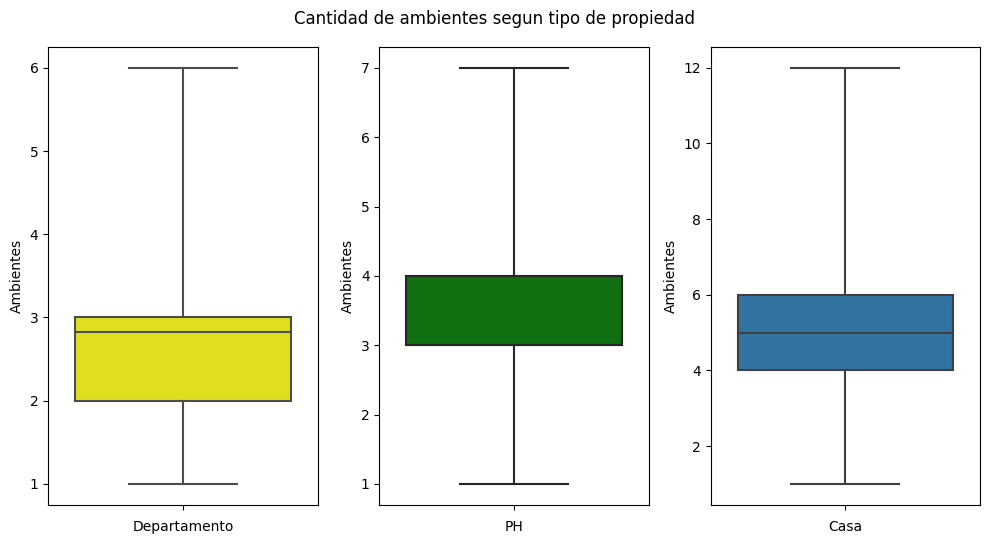

In [46]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Cantidad de ambientes segun tipo de propiedad')

properties_with_house_type_cond = df_preprocesado['property_type']  == 'Casa'
sns.boxplot(y='property_rooms',data=df_preprocesado[properties_with_house_type_cond], whis=3).set(xlabel='Casa', ylabel='Ambientes')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = df_preprocesado['property_type']  == 'Departamento'
sns.boxplot(y='property_rooms',data=df_preprocesado[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento', ylabel='Ambientes')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = df_preprocesado['property_type']  == 'PH'
sns.boxplot(y='property_rooms',data= df_preprocesado[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH', ylabel='Ambientes')
plt.sca(ax[2])
plt.xticks(rotation=45)

fig.show()

#### Analisis de la cantidad de dormitorios

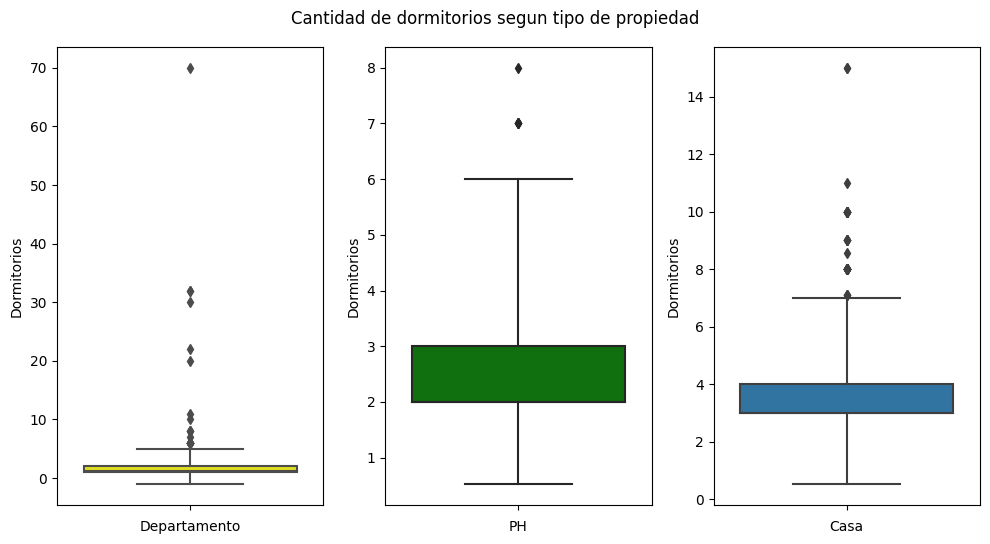

In [47]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Cantidad de dormitorios segun tipo de propiedad')

properties_with_house_type_cond =  df_preprocesado['property_type']  == 'Casa'
sns.boxplot(y='property_bedrooms',data= df_preprocesado[properties_with_house_type_cond], whis=3).set(xlabel='Casa', ylabel='Dormitorios')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond =  df_preprocesado['property_type']  == 'Departamento'
sns.boxplot(y='property_bedrooms',data= df_preprocesado[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento', ylabel='Dormitorios')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond =  df_preprocesado['property_type']  == 'PH'
sns.boxplot(y='property_bedrooms',data= df_preprocesado[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH', ylabel='Dormitorios')
plt.sca(ax[2])
plt.xticks(rotation=45)

fig.show()

In [48]:
print("Cantidad de observaciones con dormitorios negativos: %d" 
% (df_preprocesado[df_preprocesado['property_bedrooms'] < 0].shape[0]))
print('Indice y tipo de propiedad de las observaciones con dormitorios negativos:\n %s'
 % ( df_preprocesado[df_preprocesado['property_bedrooms'] < 0].property_type))

Cantidad de observaciones con dormitorios negativos: 1
Indice y tipo de propiedad de las observaciones con dormitorios negativos:
 82905    Departamento
Name: property_type, dtype: object


Siguiendo por la misma linea de consideraciones tomadas en el analisis de ambientes, en base a lo observado se procede eliminando:

- Observaciones de Casas con más de 7 dormitorios
- Observaciones de PHs con más de 6 dormitorios
- Observaciones de Departamentos con más de 5 dormitorios

Además tener en cuenta que se tiene un valor anómalo de un departamento con "-1" dormitorios. Consideramos a partir de su numero de ambientes (2) que pudo haberse tratado de un error al ingresar el dato, tratandose en realidad de una vivienda con 1 dormitorio.


In [49]:
print("Previo filtro - cantidad de filas: %d" % df_preprocesado.shape[0])
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_bedrooms"] > 7)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_bedrooms"] > 6)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_bedrooms"] > 5)].index
        , inplace= True)

print("Post filtro - cantidad de filas: %d" % df_preprocesado.shape[0])

## Habia una muestra con property_bedroom con -1 pensamos que es un error y quisieron poner 1 ya que existen 2 property_rooms
df_preprocesado.at[82905,'property_bedrooms'] = 1

Previo filtro - cantidad de filas: 84787
Post filtro - cantidad de filas: 84713


Grafico del resultrado tras el filtro

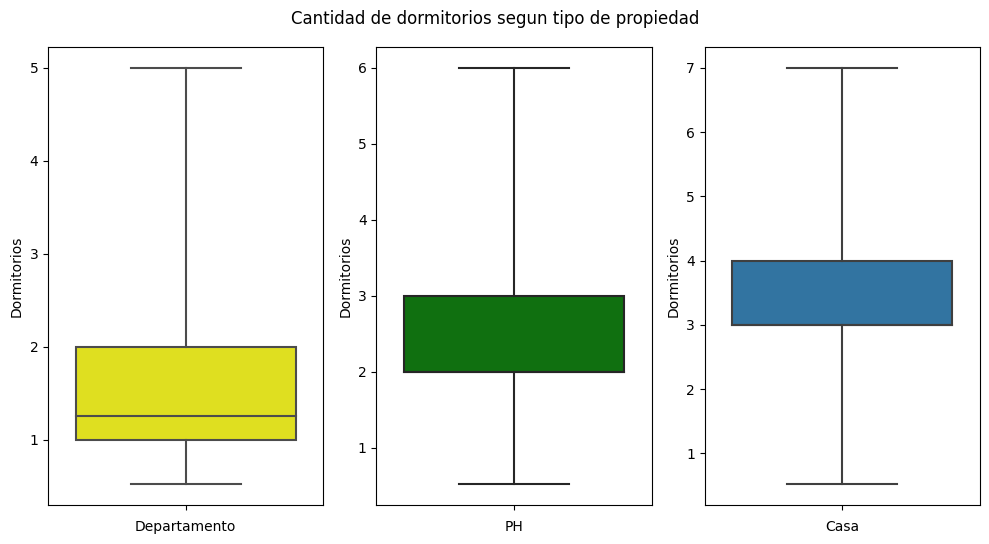

In [50]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Cantidad de dormitorios segun tipo de propiedad')

properties_with_house_type_cond = df_preprocesado['property_type']  == 'Casa'
sns.boxplot(y='property_bedrooms',data=df_preprocesado[properties_with_house_type_cond], whis=3).set(xlabel='Casa', ylabel='Dormitorios')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = df_preprocesado['property_type']  == 'Departamento'
sns.boxplot(y='property_bedrooms',data=df_preprocesado[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento', ylabel='Dormitorios')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = df_preprocesado['property_type']  == 'PH'
sns.boxplot(y='property_bedrooms',data=df_preprocesado[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH', ylabel='Dormitorios')
plt.sca(ax[2])
plt.xticks(rotation=45)

fig.show()

#### Analisis de superficie total

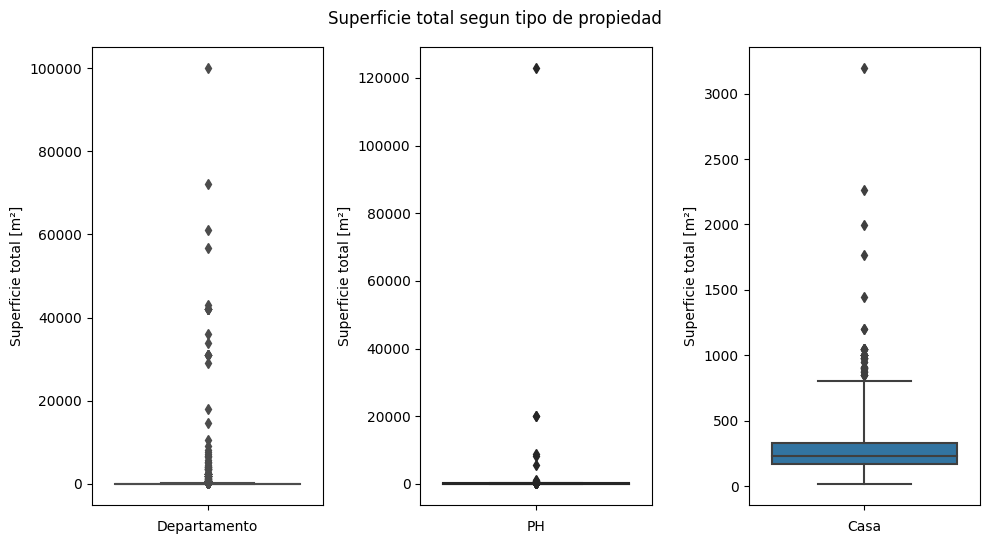

In [51]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Superficie total segun tipo de propiedad')

properties_with_house_type_cond = (df_preprocesado['property_type']  == 'Casa') 
sns.boxplot(y='property_surface_total',data=df_preprocesado[properties_with_house_type_cond], whis=3).set(xlabel='Casa', ylabel='Superficie total [m²]')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = (df_preprocesado['property_type']  == 'Departamento') 
sns.boxplot(y='property_surface_total',data=df_preprocesado[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento', ylabel='Superficie total [m²]')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = (df_preprocesado['property_type']  == 'PH') 
sns.boxplot(y='property_surface_total',data=df_preprocesado[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH', ylabel='Superficie total [m²]')
plt.sca(ax[2])
plt.xticks(rotation=45)

fig.show()

Como se puede observar, existen observaciones con superficies totales cuyos valores exceden en gran medida lo que se consideraría como una sola propiedad de clase vivienda. 

Dado se pretenden analizar datos que correspondan a esa clase de propiedad, se decidió (teniendo en cuenta lo observado) admitir viviendas con superficies totales de:
- A lo sumo 2000 metros cuadrados para el caso de Casas y PHs.   
- A lo sumo 1000 metros cuadrados para el caso de Departamentos.
Revisamos que podria ser que los valores de Departamento y PH esten en otras unidades con respecto a Casa

In [52]:
outlier_departamento_th = 1000
outlier_ph_th = 2000
outlier_casa_th = 2000
pctg_outlier_departamento = df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_surface_total"] > outlier_departamento_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Departamento')].property_surface_total.count()
pctg_outlier_ph = df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_surface_total"] > outlier_ph_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'PH')].property_surface_total.count()
pctg_outlier_casa = df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_surface_total"] > outlier_casa_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Casa')].property_surface_total.count()

print('Porcentaje del dataset aplicando el filtro a:')
print(' - Departamento %f' % (pctg_outlier_departamento))
print(' - PH %f' % (pctg_outlier_ph))
print(' - Casa %f' % (pctg_outlier_casa))

Porcentaje del dataset aplicando el filtro a:
 - Departamento 0.113063
 - PH 0.069751
 - Casa 0.055788


In [53]:
print("Previo filtro - cantidad de filas: %d" % df_preprocesado.shape[0])
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_surface_total"] > outlier_casa_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_surface_total"] > outlier_ph_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_surface_total"] > outlier_departamento_th)].index
        , inplace= True)

print("Post filtro - cantidad de filas: %d" % df_preprocesado.shape[0])

Previo filtro - cantidad de filas: 84713
Post filtro - cantidad de filas: 84623


Se grafica el resultado tras aplicar el filtro

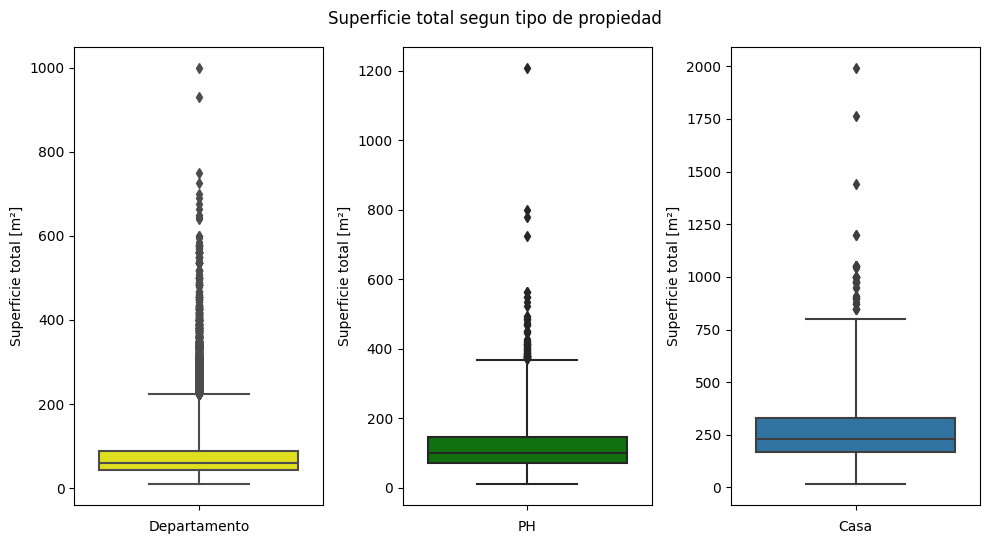

In [54]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Superficie total segun tipo de propiedad')

properties_with_house_type_cond = df_preprocesado['property_type']  == 'Casa'
sns.boxplot(y='property_surface_total',data=df_preprocesado[properties_with_house_type_cond], whis=3).set(xlabel='Casa', ylabel= 'Superficie total [m²]')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = df_preprocesado['property_type']  == 'Departamento'
sns.boxplot(y='property_surface_total',data=df_preprocesado[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento', ylabel= 'Superficie total [m²]')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = df_preprocesado['property_type']  == 'PH'
sns.boxplot(y='property_surface_total',data=df_preprocesado[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH', ylabel= 'Superficie total [m²]')
plt.sca(ax[2])
plt.xticks(rotation=45)

fig.show()

Corroboramos que siguen quedando outliers, por lo tanto filtramos nuevamente

In [55]:
outlier_departamento_th = 230
outlier_ph_th = 370
outlier_casa_th = 800
pctg_outlier_departamento = df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_surface_total"] > outlier_departamento_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Departamento')].property_surface_total.count()
pctg_outlier_ph = df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_surface_total"] > outlier_ph_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'PH')].property_surface_total.count()
pctg_outlier_casa = df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_surface_total"] > outlier_casa_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Casa')].property_surface_total.count()

print('Porcentaje del dataset aplicando el filtro a:')
print(' - Departamento %f' % (pctg_outlier_departamento))
print(' - PH %f' % (pctg_outlier_ph))
print(' - Casa %f' % (pctg_outlier_casa))

Porcentaje del dataset aplicando el filtro a:
 - Departamento 2.444647
 - PH 0.756166
 - Casa 1.200112


In [56]:
print("Previo filtro - cantidad de filas: %d" % df_preprocesado.shape[0])
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_surface_total"] > outlier_casa_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_surface_total"] > outlier_ph_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_surface_total"] > outlier_departamento_th)].index
        , inplace= True)

print("Post filtro - cantidad de filas: %d" % df_preprocesado.shape[0])

Previo filtro - cantidad de filas: 84623
Post filtro - cantidad de filas: 82744


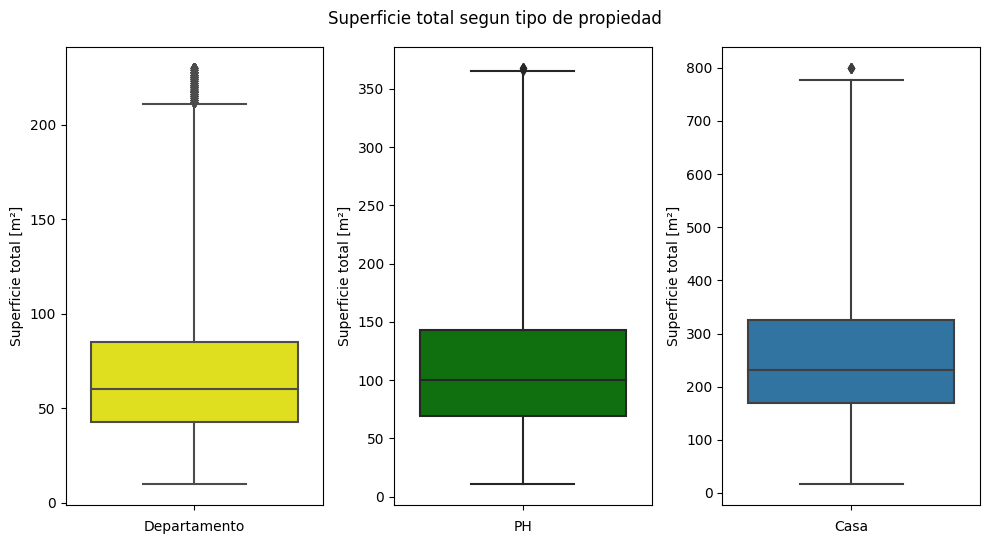

In [57]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Superficie total segun tipo de propiedad')

properties_with_house_type_cond = df_preprocesado['property_type']  == 'Casa'
sns.boxplot(y='property_surface_total',data=df_preprocesado[properties_with_house_type_cond], whis=3).set(xlabel='Casa', ylabel= 'Superficie total [m²]')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = df_preprocesado['property_type']  == 'Departamento'
sns.boxplot(y='property_surface_total',data=df_preprocesado[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento', ylabel= 'Superficie total [m²]')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = df_preprocesado['property_type']  == 'PH'
sns.boxplot(y='property_surface_total',data=df_preprocesado[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH', ylabel= 'Superficie total [m²]')
plt.sca(ax[2])
plt.xticks(rotation=45)

fig.show()

#### Analisis de la superficie cubierta

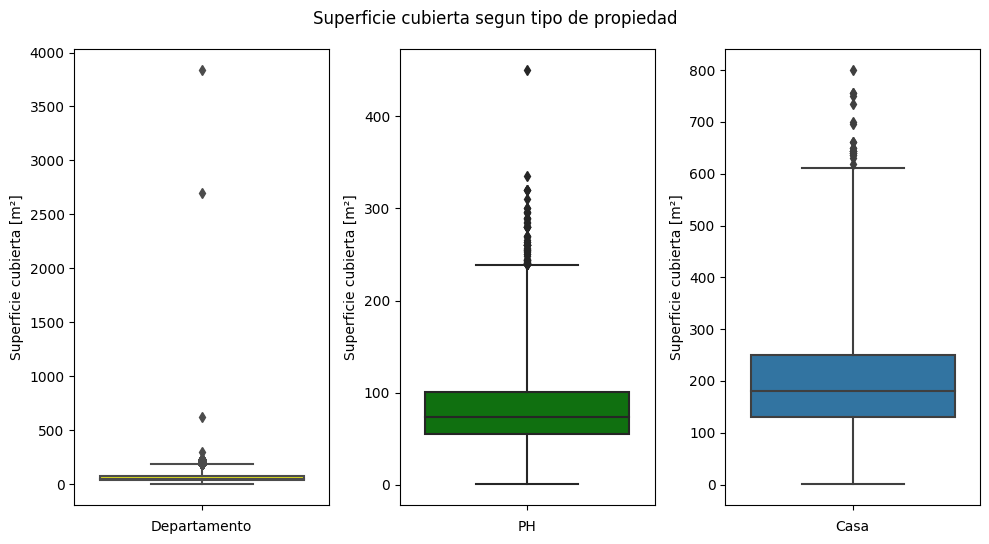

In [58]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Superficie cubierta segun tipo de propiedad')

properties_with_house_type_cond = (df_preprocesado['property_type']  == 'Casa')
sns.boxplot(y='property_surface_covered',data=df_preprocesado[properties_with_house_type_cond], whis=3).set(xlabel='Casa', ylabel='Superficie cubierta [m²]')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = (df_preprocesado['property_type']  == 'Departamento')
sns.boxplot(y='property_surface_covered',data=df_preprocesado[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento', ylabel='Superficie cubierta [m²]')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = (df_preprocesado['property_type']  == 'PH')
sns.boxplot(y='property_surface_covered',data=df_preprocesado[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH', ylabel='Superficie cubierta [m²]')
plt.sca(ax[2])
plt.xticks(rotation=45)

fig.show()

Para la superficie cubierta se observan resultados similares al analisis de superficie total, y continuando con el mismo criterio se decide, teniendo en cuenta lo observado, admitir viviendas con superficies cubiertas de:
- A lo sumo 800 metros cuadrados para el caso de Casas y PHs.   
- A lo sumo 600 metros cuadrados para el caso de Departamentos.   

In [59]:
outlier_departamento_th = 600
outlier_ph_th = 800
outlier_casa_th = 800
pctg_outlier_departamento = df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_surface_covered"] > outlier_departamento_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Departamento')].property_surface_total.count()
pctg_outlier_ph = df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_surface_covered"] > outlier_ph_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'PH')].property_surface_total.count()
pctg_outlier_casa = df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_surface_covered"] > outlier_casa_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Casa')].property_surface_total.count()

print('Porcentaje del dataset aplicando el filtro a:')
print(' - Departamento %f' % (pctg_outlier_departamento))
print(' - PH %f' % (pctg_outlier_ph))
print(' - Casa %f' % (pctg_outlier_casa))

Porcentaje del dataset aplicando el filtro a:
 - Departamento 0.004245
 - PH 0.000000
 - Casa 0.000000


In [60]:
print("Previo filtro - cantidad de filas: %d" % df_preprocesado.shape[0])
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado['property_surface_covered'] > outlier_casa_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado['property_surface_covered'] > outlier_ph_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado['property_surface_covered'] > outlier_departamento_th)].index
        , inplace= True)

print("Post filtro - cantidad de filas: %d" % df_preprocesado.shape[0])

Previo filtro - cantidad de filas: 82744
Post filtro - cantidad de filas: 82741


Graficamos los resultados del filtro

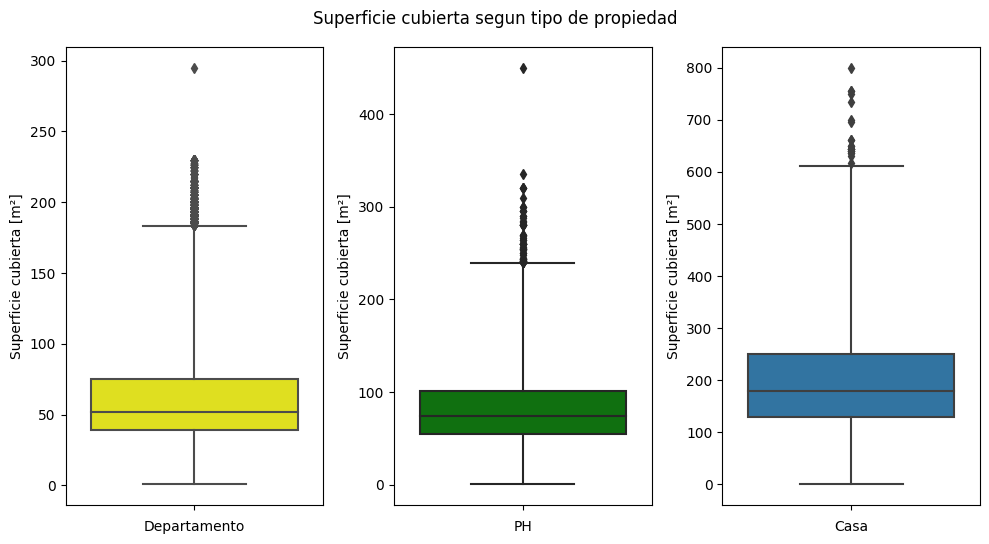

In [61]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Superficie cubierta segun tipo de propiedad')

properties_with_house_type_cond = df_preprocesado['property_type']  == 'Casa'
sns.boxplot(y='property_surface_covered',data=df_preprocesado[properties_with_house_type_cond], whis=3).set(xlabel='Casa',ylabel='Superficie cubierta [m²]')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = df_preprocesado['property_type']  == 'Departamento'
sns.boxplot(y='property_surface_covered',data=df_preprocesado[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento', ylabel='Superficie cubierta [m²]')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = df_preprocesado['property_type']  == 'PH'
sns.boxplot(y='property_surface_covered',data=df_preprocesado[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH', ylabel='Superficie cubierta [m²]')
plt.sca(ax[2])
plt.xticks(rotation=45)

fig.show()

vemos que debemos ajustar mas los valores

In [62]:
outlier_departamento_th = 200
outlier_ph_th = 300
outlier_casa_th = 700
pctg_outlier_departamento = df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_surface_covered"] > outlier_departamento_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Departamento')].property_surface_total.count()
pctg_outlier_ph = df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_surface_covered"] > outlier_ph_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'PH')].property_surface_total.count()
pctg_outlier_casa = df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_surface_covered"] > outlier_casa_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Casa')].property_surface_total.count()

print('Porcentaje del dataset aplicando el filtro a:')
print(' - Departamento %f' % (pctg_outlier_departamento))
print(' - PH %f' % (pctg_outlier_ph))
print(' - Casa %f' % (pctg_outlier_casa))

print("Previo filtro - cantidad de filas: %d" % df_preprocesado.shape[0])
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado['property_surface_covered'] > outlier_casa_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado['property_surface_covered'] > outlier_ph_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado['property_surface_covered'] > outlier_departamento_th)].index
        , inplace= True)

print("Post filtro - cantidad de filas: %d" % df_preprocesado.shape[0])

Porcentaje del dataset aplicando el filtro a:
 - Departamento 0.417433
 - PH 0.070332
 - Casa 0.141243
Previo filtro - cantidad de filas: 82741
Post filtro - cantidad de filas: 82435


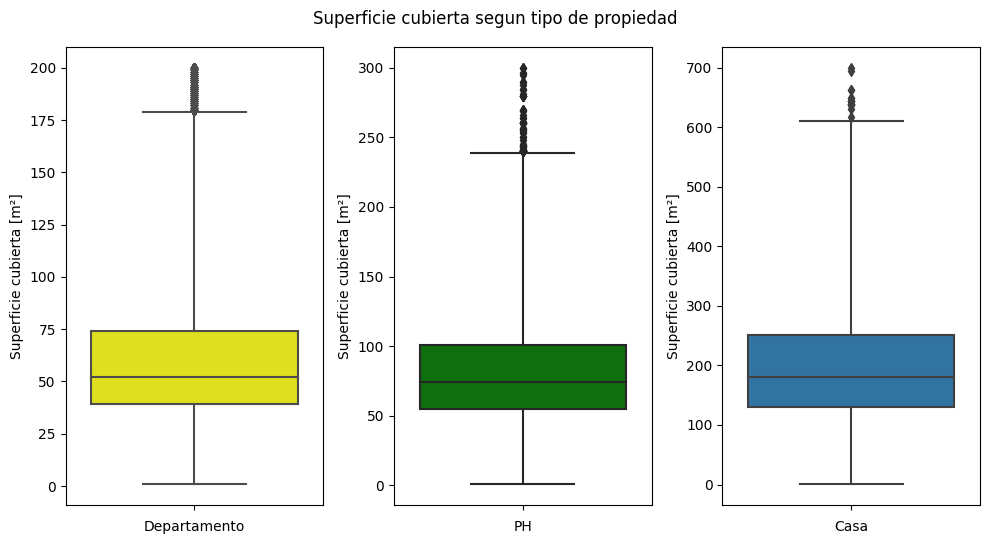

In [63]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Superficie cubierta segun tipo de propiedad')

properties_with_house_type_cond = df_preprocesado['property_type']  == 'Casa'
sns.boxplot(y='property_surface_covered',data=df_preprocesado[properties_with_house_type_cond], whis=3).set(xlabel='Casa',ylabel='Superficie cubierta [m²]')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = df_preprocesado['property_type']  == 'Departamento'
sns.boxplot(y='property_surface_covered',data=df_preprocesado[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento', ylabel='Superficie cubierta [m²]')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = df_preprocesado['property_type']  == 'PH'
sns.boxplot(y='property_surface_covered',data=df_preprocesado[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH', ylabel='Superficie cubierta [m²]')
plt.sca(ax[2])
plt.xticks(rotation=45)

fig.show()

#### Analisis de precios

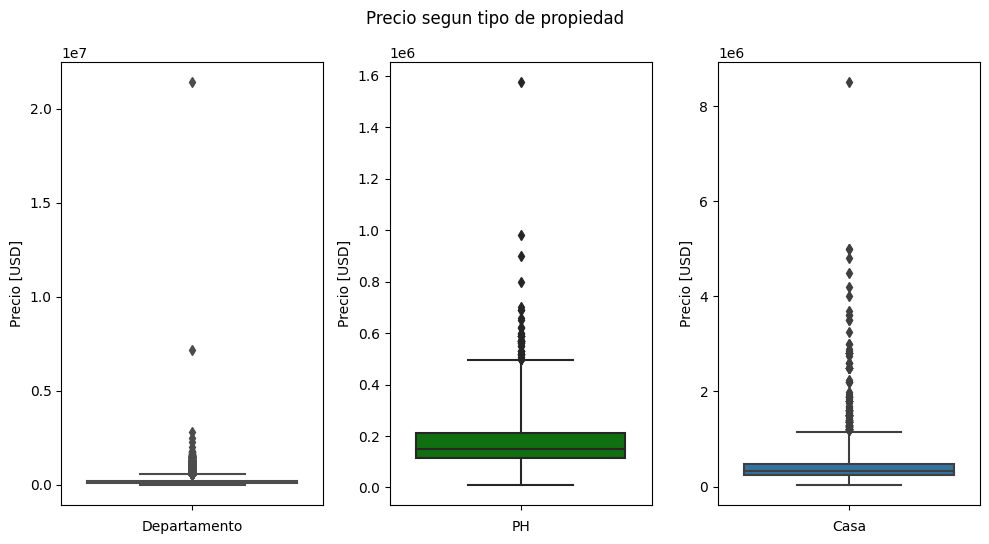

In [64]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Precio segun tipo de propiedad')

properties_with_house_type_cond = (df_preprocesado['property_type']  == 'Casa') 
sns.boxplot(y='property_price',data=df_preprocesado[properties_with_house_type_cond], whis=3).set(xlabel='Casa', ylabel='Precio [USD]')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = (df_preprocesado['property_type']  == 'Departamento') 
sns.boxplot(y='property_price',data=df_preprocesado[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento', ylabel='Precio [USD]')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = (df_preprocesado['property_type']  == 'PH') 
sns.boxplot(y='property_price',data=df_preprocesado[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH', ylabel='Precio [USD]')
plt.sca(ax[2])
plt.xticks(rotation=45)


fig.show()


Siguiendo con el mismo criterio que los features anteriores, se considera adecuada la eliminación (cuidadosamente) de:
- Observaciones de Casas con precio de a lo sumo medio millon de dolares
- Observaciones de PHs con precio de a lo sumo un millon de dolares
- Observaciones de Departamentos con precio de a lo sumo un millon de dolares

**Tener en cuenta que para esta feature se tiene un margen bastante más amplio de valores admitidos a pesar de ser marcados como outliers por la visualización.** Esto es debido a que consideramos que, debido a que es un factor clave del objetivo del trabajo, el precio debe tratarse con mucha más consideracion hacia valores altos, por lo menos para no descartar observaciones inncesariamente sin antes haber realizado un análisis multivariado de outliers.    

In [65]:
outlier_departamento_th = 0.8e6
outlier_ph_th = 0.8e6
outlier_casa_th = 1.5e6
pctg_outlier_departamento = df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_price"] > outlier_departamento_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Departamento')].property_surface_total.count()
pctg_outlier_ph = df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_price"] > outlier_ph_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'PH')].property_surface_total.count()
pctg_outlier_casa = df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_price"] > outlier_casa_th)].property_surface_total.count()*100 / df_preprocesado[(df_preprocesado['property_type']  == 'Casa')].property_surface_total.count()

print('Porcentaje del dataset aplicando el filtro a:')
print(' - Departamento %f' % (pctg_outlier_departamento))
print(' - PH %f' % (pctg_outlier_ph))
print(' - Casa %f' % (pctg_outlier_casa))

print("Previo filtro - cantidad de filas: %d" % df_preprocesado.shape[0])
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Casa') & (df_preprocesado["property_price"] > outlier_casa_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'PH') & (df_preprocesado["property_price"] > outlier_ph_th)].index
    , inplace= True)
df_preprocesado.drop(
    df_preprocesado[(df_preprocesado['property_type']  == 'Departamento') & (df_preprocesado["property_price"] > outlier_departamento_th)].index
        , inplace= True)

print("Post filtro - cantidad de filas: %d" % df_preprocesado.shape[0])

Porcentaje del dataset aplicando el filtro a:
 - Departamento 0.910835
 - PH 0.035191
 - Casa 2.121641
Previo filtro - cantidad de filas: 82435
Post filtro - cantidad de filas: 81716


Se grafica el resultado del filtrado

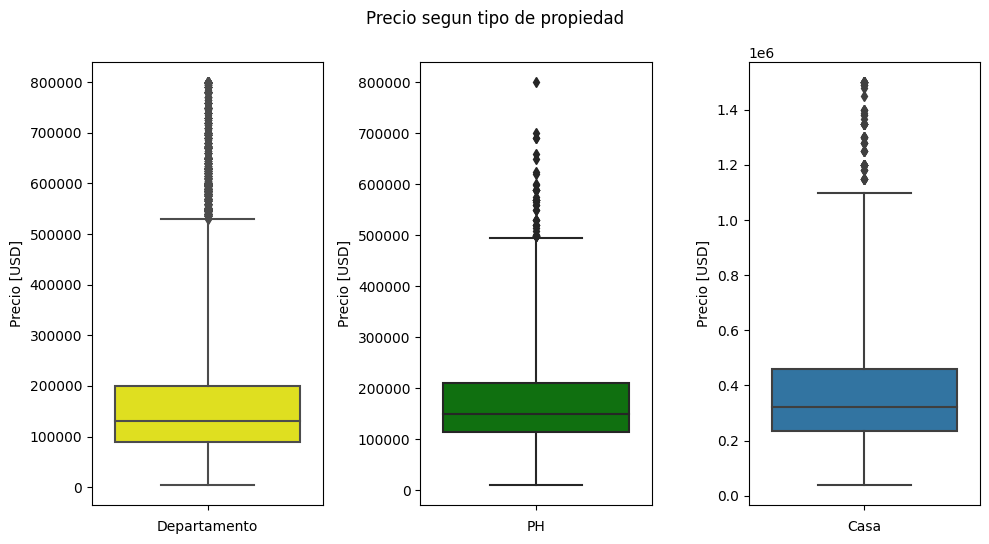

In [66]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Precio segun tipo de propiedad')

properties_with_house_type_cond = df_preprocesado['property_type']  == 'Casa'
sns.boxplot(y='property_price',data=df_preprocesado[properties_with_house_type_cond], whis=3).set(xlabel='Casa', ylabel='Precio [USD]')
plt.sca(ax[0])
plt.xticks(rotation=45)

properties_with_dept_type_cond = df_preprocesado['property_type']  == 'Departamento'
sns.boxplot(y='property_price',data=df_preprocesado[properties_with_dept_type_cond], whis=3, color='yellow').set(xlabel='Departamento', ylabel='Precio [USD]')
plt.sca(ax[1])
plt.xticks(rotation=45)

properties_with_PH_type_cond = df_preprocesado['property_type']  == 'PH'
sns.boxplot(y='property_price',data=df_preprocesado[properties_with_PH_type_cond], whis=3, color='green').set(xlabel='PH', ylabel='Precio [USD]')
plt.sca(ax[2])
plt.xticks(rotation=45)

fig.show()

#### *NOTA 2:* Falta acabar analisis e informe del zscore. De todas formas yo lo dejaria para despues, incluso no se si es necesario porque ya medio que esta hecho el analisis univariado completo con las boxplots. Revisar si es necesario o no 

In [67]:
ds_zscore = pd.DataFrame()
ds_zscore['z_score_rooms']=st.zscore(df_preprocesado.property_rooms, nan_policy='omit')
ds_zscore['z_score_bedrooms']=st.zscore(df_preprocesado.property_bedrooms, nan_policy='omit')
ds_zscore['z_score_surface_total'] = st.zscore(df_preprocesado.property_surface_total, nan_policy='omit')
ds_zscore['z_score_surface_covered'] = st.zscore(df_preprocesado.property_surface_covered, nan_policy='omit')
ds_zscore['z_score_price'] = st.zscore(df_preprocesado.property_price)

print(df_preprocesado[ds_zscore['z_score_rooms']>3].shape)
print(df_preprocesado[ds_zscore['z_score_rooms']<-3].shape)
print()

print(df_preprocesado[ds_zscore['z_score_bedrooms']>3].shape)
print(df_preprocesado[ds_zscore['z_score_bedrooms']<-3].shape)
print()

print(df_preprocesado[ds_zscore['z_score_surface_total']>3].shape)
print(df_preprocesado[ds_zscore['z_score_surface_total']<-3].shape)
print()

print(df_preprocesado[ds_zscore['z_score_surface_covered']>3].shape)
print(df_preprocesado[ds_zscore['z_score_surface_covered']<-3].shape)
print()

print(df_preprocesado[ds_zscore['z_score_price']>3].shape)
print(df_preprocesado[ds_zscore['z_score_price']<-3].shape)

ds_zscore.head()

(485, 15)
(0, 15)

(656, 15)
(0, 15)

(1511, 15)
(0, 15)

(1367, 15)
(0, 15)

(1800, 15)
(0, 15)


,z_score_rooms,z_score_bedrooms,z_score_surface_total,z_score_surface_covered,z_score_price
1,0.245546,0.238397,-0.388563,-0.296890,-0.728162
2,1.067110,1.262583,-0.190442,0.019176,-0.605086
3,1.067110,0.238397,0.759432,0.735593,-0.245799
4,1.067110,0.238397,0.232066,0.082389,0.549221
5,-0.576019,-0.785789,-0.339033,-0.486530,-0.597442


[Text(0.5, 0, 'Std deviation'), Text(0, 0.5, 'Property quantity')]

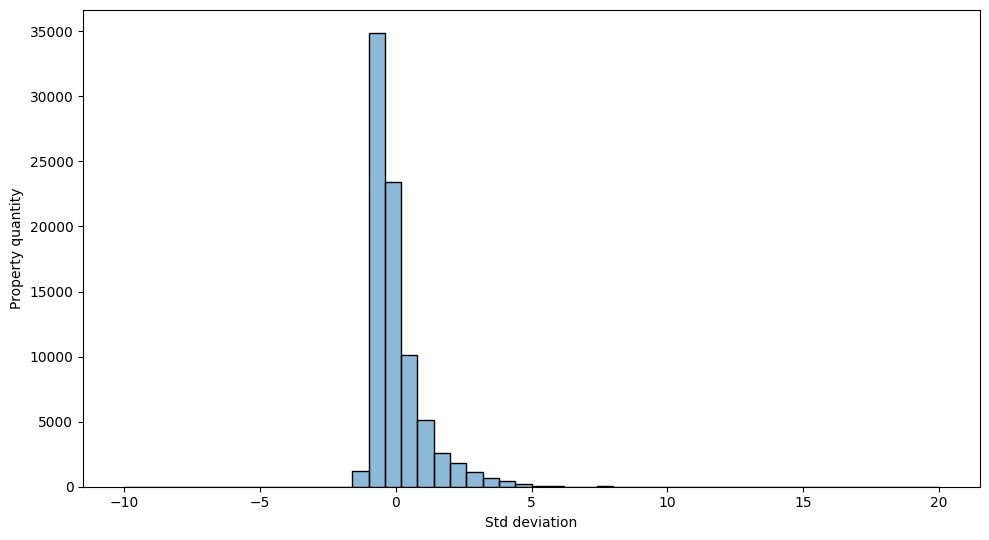

In [68]:
sns.histplot(bins=50, binrange=(-10,20) ,data=ds_zscore['z_score_price'], alpha = 0.5).set(xlabel="Std deviation",ylabel="Property quantity")

##  PENDIENTES: 

- Analisis multivariados que faltan:
    - **[Usando Clustering con distancia de Mahalanobis]**
    - Superficie total con Superficie cubierta 
    - Cantidad de ambientes con Cantidad de dormitorios
    - Precio con cantidad de ambientes (o si se quiere, tambien con cantidad de dormitorios)
    - Precio con superficies (si se quiere tmb con ambas. Este es pedido por el enunciado)

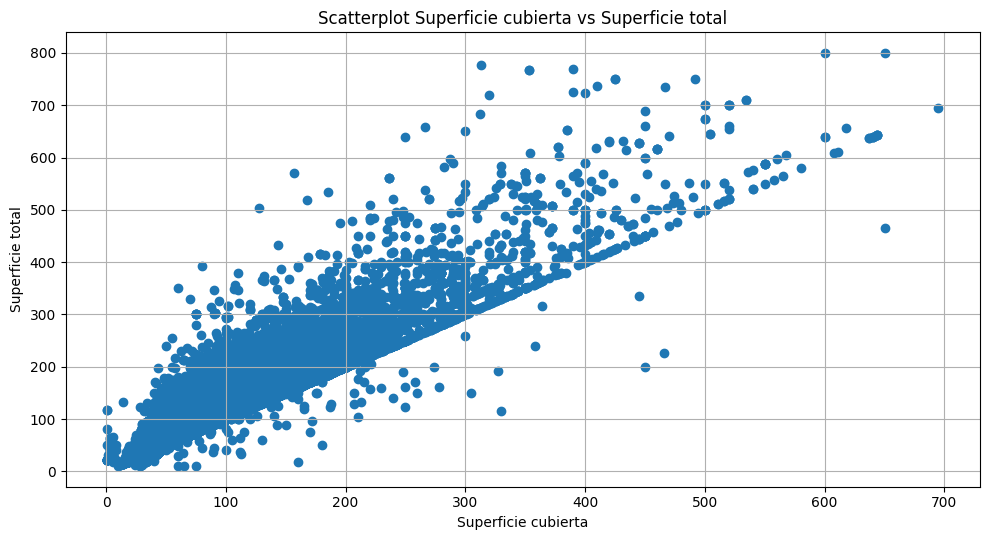

In [69]:
plt.scatter(df_preprocesado.property_surface_covered, df_preprocesado.property_surface_total)
plt.title('Scatterplot Superficie cubierta vs Superficie total')
plt.xlabel('Superficie cubierta')
plt.ylabel('Superficie total')
plt.grid()
plt.show()

In [70]:
df_outlier_1 = df_preprocesado[['property_surface_covered','property_surface_total']]
df = df_outlier_1.copy()
print(df.describe())
df = df.dropna()
df = df.to_numpy()
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

# Distances between center point and 
distances = []
for i, val in enumerate(df):
      p1 = val
      p2 = centerpoint
      distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
      distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = st.chi2.ppf(0.99, df.shape[1])

# Index of outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index of Outliers ----')
print(outlierIndexes)
# array([24, 35, 67, 81])

print('--- Observations found as outlier -----')
print(df[ distances > cutoff , :])
# print('size of datset: %f' % (df_outlier_1.count()))
print('Porcentaje de outliers: %.3f %%' % (df[ distances > cutoff , :].size*100 / df_outlier_1.shape[0]))
df_outlier_1.drop(df_outlier_1.index[outlierIndexes], inplace=True)

       property_surface_covered  property_surface_total
count              81716.000000            81716.000000
mean                  69.089947               81.534904
std                   47.458703               60.569464
min                    1.000000               10.000000
25%                   40.000000               45.000000
50%                   55.000000               64.000000
75%                   80.077907               97.000000
max                  695.000000              800.000000
--- Index of Outliers ----
(array([   79,    94,   158, ..., 81465, 81466, 81467]),)
--- Observations found as outlier -----
[[ 94. 226.]
 [111. 201.]
 [201. 201.]
 ...
 [322. 342.]
 [340. 480.]
 [474. 526.]]
Porcentaje de outliers: 7.678 %


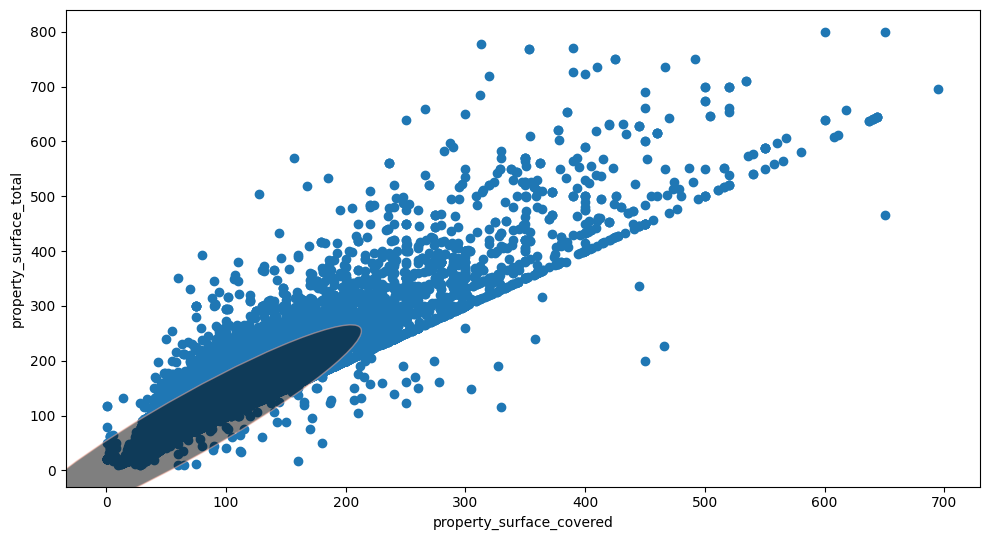

In [71]:
## Finding ellipse dimensions 
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#000000')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
plt.scatter(df[: , 0], df[ : , 1])
ax.add_artist(ellipse)
plt.xlabel("property_surface_covered")
plt.ylabel("property_surface_total")
plt.show()

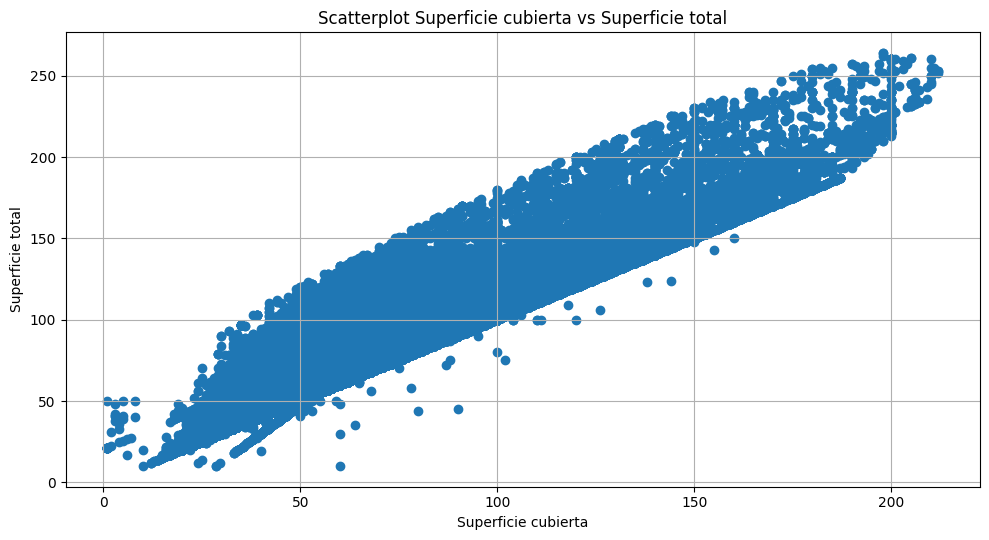

In [72]:
plt.scatter(df_outlier_1.property_surface_covered, df_outlier_1.property_surface_total)
plt.title('Scatterplot Superficie cubierta vs Superficie total')
plt.xlabel('Superficie cubierta')
plt.ylabel('Superficie total')
plt.grid()
plt.show()

### d) Reducción de la dimensionalidad

(TODO) 

In [73]:
### pruebas PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
ds_prueba_pca = df_preprocesado.copy()
target = 'property_price'
columnas_elegidas_pca = [
    'property_bedrooms',
    'property_rooms',
    'property_surface_total',
    'property_surface_covered',
    'property_price'
]

xpca = ds_prueba_pca[columnas_elegidas_pca].values
xpca = StandardScaler().fit_transform(xpca)
pca = PCA(n_components=3)
xpca_transformada = pca.fit_transform(xpca)
pca.explained_variance_ratio_.cumsum()


array([0.80681434, 0.91749483, 0.9775089 ])

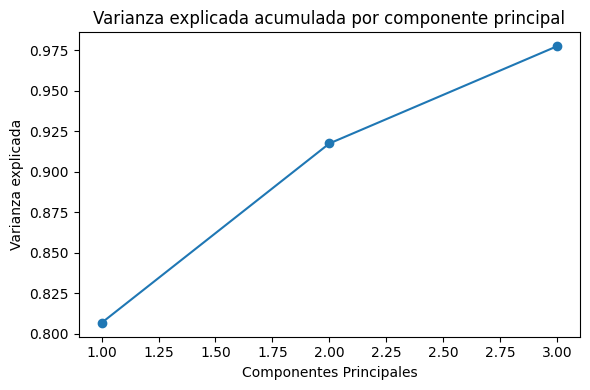

In [74]:
pca_varianza_explicada = pca.explained_variance_ratio_.cumsum()
list_x = list(range(1, len(pca_varianza_explicada)+1))

# Grafico varianza explicada y cantidad de componentes principales
plt.figure(figsize=(6, 4))
plt.plot(list_x, pca_varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada acumulada por componente principal')
plt.show()

Vemos que con 2 componentes principales tenemos el 91.17% de la varianza total.
Por lo que podemos pensar que podemos reducir las columnas elegidas (correlacionadas) a solamente 2 dimensiones.

In [75]:
df_pca = pd.DataFrame(
    data = xpca_transformada,
    columns = ['cp1','cp2','cp3']
)
#df_pca['type'] = df_preprocesado['property_price'] < (df_preprocesado['property_price'].mean())
print(df_pca)

            cp1       cp2       cp3
0     -0.396837 -0.842208  0.118035
1      0.720738 -1.609814 -0.032353
2      1.182587 -0.420259  0.686433
3      0.958102 -0.271615 -0.418877
4     -1.238080  0.166330  0.270486
...         ...       ...       ...
81711  1.848619 -0.665827  0.089414
81712 -0.028427 -0.433820 -0.177142
81713 -1.920134  0.344940  0.293029
81714 -2.019412  0.284558  0.181998
81715 -0.579233  0.617540  0.596712

[81716 rows x 3 columns]


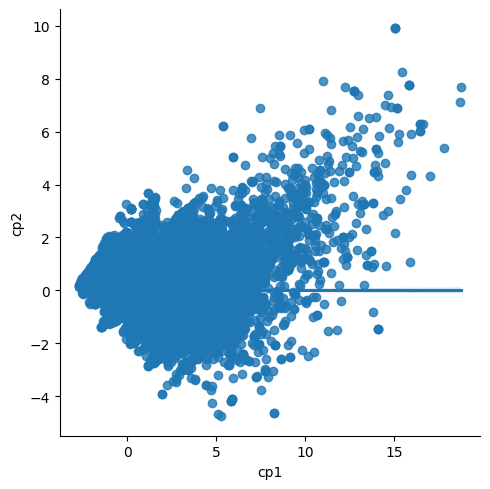

In [76]:
sns.lmplot(x='cp1', y='cp2', data=df_pca)

## 2. Agrupamiento

- En este punto buscaremos analizar si es posible agrupar los datos en función de algún criterio. Para esta tarea usaremos el algoritmo K-Means 

In [77]:
import sklearn as sklearn
from sklearn.cluster import KMeans

- Podemos observar que muchas de nuestras variables necesitan una transformaciones ya que queremos utilizar variables categóricas como variables predictoras, necesitamos realizar transformaciones sobre las mismas.

In [78]:
dataset_array = ds_properati.values
print(dataset_array.dtype)
print(dataset_array)

object
[[Timestamp('2021-09-09 00:00:00') Timestamp('2021-09-26 00:00:00')
  -34.6373187 ... 82900.0 'USD' 'VENTA TRES AMBIENTES LA BOCA PISO ALTO']
 [Timestamp('2021-09-09 00:00:00') Timestamp('2021-09-28 00:00:00')
  -34.6286465 ... 99000.0 'USD'
  'Departamento - 4 Ambientes - Catalinas Sur']
 [Timestamp('2021-09-09 00:00:00') Timestamp('2022-01-05 00:00:00')
  -34.6100272 ... 146000.0 'USD' 'Venta departamento 4 ambientes Once']
 ...
 [Timestamp('2021-01-05 00:00:00') Timestamp('2021-01-27 00:00:00')
  -34.614175 ... 75500.0 'USD'
  'VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA //// APTO CREDITO HIPOTECARIO']
 [Timestamp('2021-01-05 00:00:00') Timestamp('2021-01-27 00:00:00')
  -34.614175 ... 74500.0 'USD'
  'VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF C/ BALCÓN Vta Ata, PISO ALTO. BAJAS EXP. // APTO CRED.']
 [Timestamp('2021-01-05 00:00:00') Timestamp('2021-01-08 00:00:00')
  -34.59979 ... 135000.0 'USD' 'VENTA DEPTO 2 1/2 AMBIENTES - CENTRO']]


In [106]:
ds_prueba=ds_properati.copy()
ds_clusters= ds_properati.copy()
ds_cluster_ptpc= pd.DataFrame()

In [107]:
ds_properati.copy()

,start_date,end_date,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
1,2021-09-09,2021-09-26,-34.637319,-58.361124,Capital Federal,Boca,Venta,Departamento,3.0,2.0,58.000000,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,2021-09-09,2021-09-28,-34.628647,-58.361871,Capital Federal,Boca,Venta,Departamento,4.0,3.0,70.000000,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
3,2021-09-09,2022-01-05,-34.610027,-58.401934,Capital Federal,Once,Venta,Departamento,4.0,2.0,127.533018,104.0,146000.0,USD,Venta departamento 4 ambientes Once
4,2021-09-09,2022-03-09,-34.631621,-58.416825,Capital Federal,Boedo,Venta,PH,4.0,2.0,95.590910,73.0,250000.0,USD,PH - Boedo
5,2021-09-09,2022-01-27,-34.623886,-58.412746,Capital Federal,Boedo,Venta,PH,2.0,1.0,61.000000,46.0,100000.0,USD,PH 2 Ambientes c/Patio HECHO A NUEVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94244,2021-01-05,2022-09-02,-34.603245,-58.489810,Capital Federal,Villa del Parque,Venta,Departamento,4.0,3.0,130.000000,100.0,220000.0,USD,Espectacular 4 amb130m2 con Balcon Terraza!!!
94245,2021-01-05,2021-02-17,-34.614063,-58.482814,Capital Federal,Villa del Parque,Venta,Departamento,3.0,2.0,68.000000,60.0,161000.0,USD,3 ambientes con cochera listo para habitar!
94246,2021-01-05,2021-01-27,-34.614175,-58.479062,Capital Federal,Villa del Parque,Venta,Departamento,1.0,1.0,51.000000,30.0,75500.0,USD,VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...
94247,2021-01-05,2021-01-27,-34.614175,-58.479062,Capital Federal,Villa del Parque,Venta,Departamento,1.0,1.0,37.000000,31.0,74500.0,USD,VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF ...


In [108]:
ds_cluster_ptpc['property_type']= ds_properati.iloc[:, 7] # Primera columna
ds_cluster_ptpc['property_rooms']= ds_properati.iloc[:, 8] # Primera columna

In [130]:
#!pip install pyclustertend

#from pyclustertend import hopkins

#hopkins(ds_cluster_ptpc,ds_cluster_ptpc.shape[0])

In [109]:
ds_cluster_ptpc.head()

,property_type,property_rooms
1,Departamento,3.0
2,Departamento,4.0
3,Departamento,4.0
4,PH,4.0
5,PH,2.0


In [110]:
#One hot encoding para variables categoricas
ds_cluster_ptpc = pd.get_dummies(ds_cluster_ptpc, columns=["property_type"], drop_first=True)
ds_cluster_ptpc.head()

,property_rooms,property_type_Departamento,property_type_PH
1,3.0,1,0
2,4.0,1,0
3,4.0,1,0
4,4.0,0,1
5,2.0,0,1


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


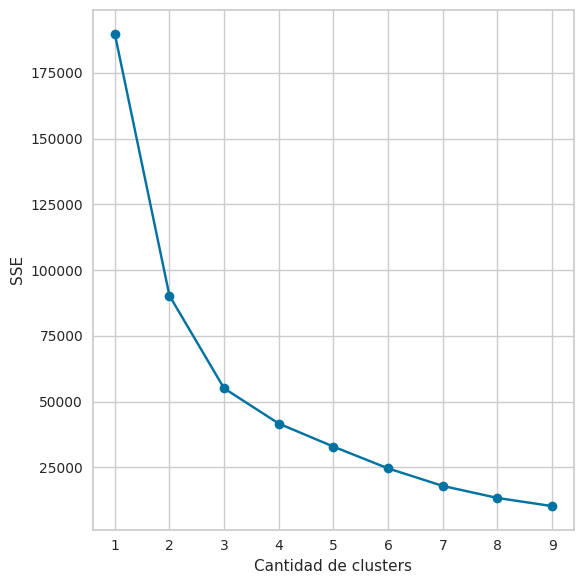

In [111]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_cluster_ptpc)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

In [133]:
kmeans = KMeans(n_clusters=4)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento

kmeans.fit(ds_cluster_ptpc) #Entrenamos el algoritmo para que aprenda cómo agrupar

y_kmeans = kmeans.predict(ds_cluster_ptpc)
list(y_kmeans)

[3,
 1,
 1,
 1,
 0,
 1,
 0,
 3,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 3,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 3,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 3,
 3,
 1,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 1,
 3,
 0,
 0,
 1,
 0,
 3,
 0,
 3,
 0,
 1,
 3,
 0,
 1,
 0,
 0,
 3,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 3,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 3,
 2,
 0,
 0,
 3,
 3,
 1,
 0,
 1,
 1,
 3,
 0,
 3,
 0,
 0,
 3,
 1,
 1,
 0,
 0,
 1,
 3,
 1,
 0,
 3,
 3,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 1,
 1,
 0,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 2,
 0,
 0,
 3,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 3,
 3,
 0,
 1,
 3,
 0,
 3,
 0,
 3,
 0,
 1,
 3,
 0,
 1,
 3,
 1,
 1,
 1,
 1,
 0,
 3,
 0,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 3,
 3,
 1,
 2,
 0,
 3,
 0,
 3,
 3,
 3,
 1,


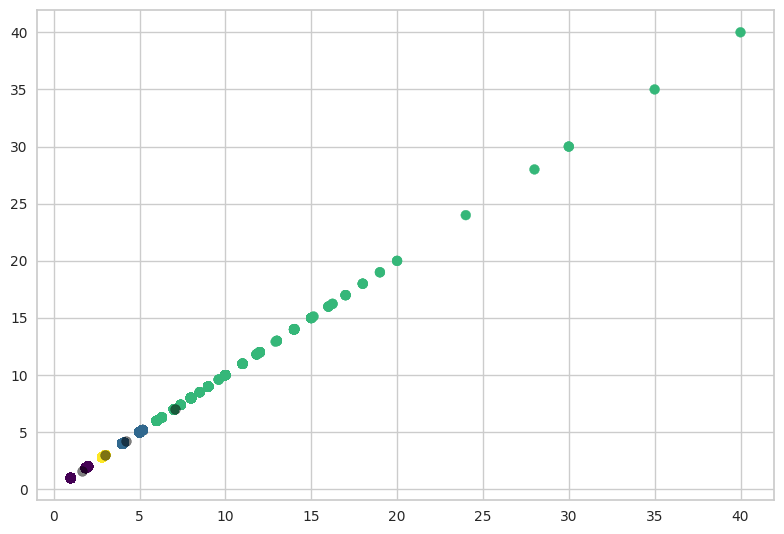

In [134]:
plt.scatter(ds_cluster_ptpc.iloc[:, 0], ds_cluster_ptpc.iloc[:, 0], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 0], c='black', s=200, alpha=0.5,marker='.')
plt.show()

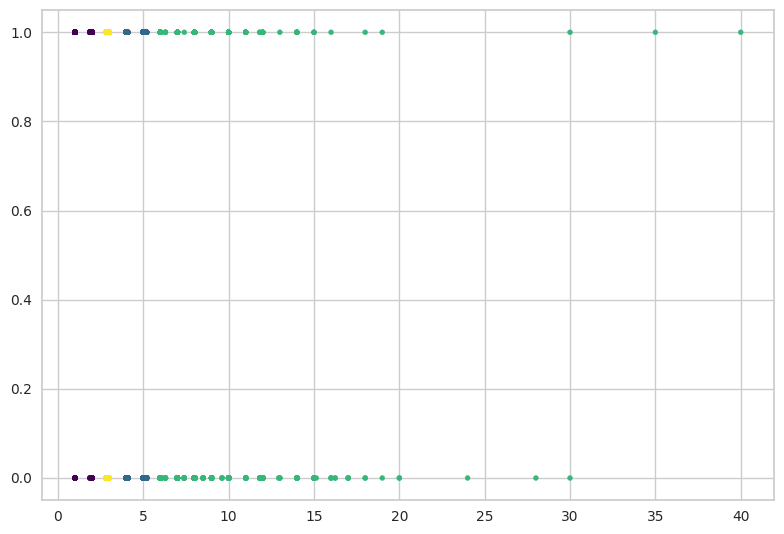

In [135]:
plt.scatter(ds_cluster_ptpc.iloc[:, 0], ds_cluster_ptpc.iloc[:, 1], c=y_kmeans,
            s=50, cmap='viridis',marker=".")
plt.show()

In [131]:
from sklearn.metrics import silhouette_score

list_k = list(range(2, 6))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds_cluster_ptpc)

    score = silhouette_score (ds_cluster_ptpc, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.5722247666583571
For n_clusters =3 silhouette score is 0.5971409185228539
For n_clusters =4 silhouette score is 0.6164797246582566
For n_clusters =5 silhouette score is 0.7118693282253404


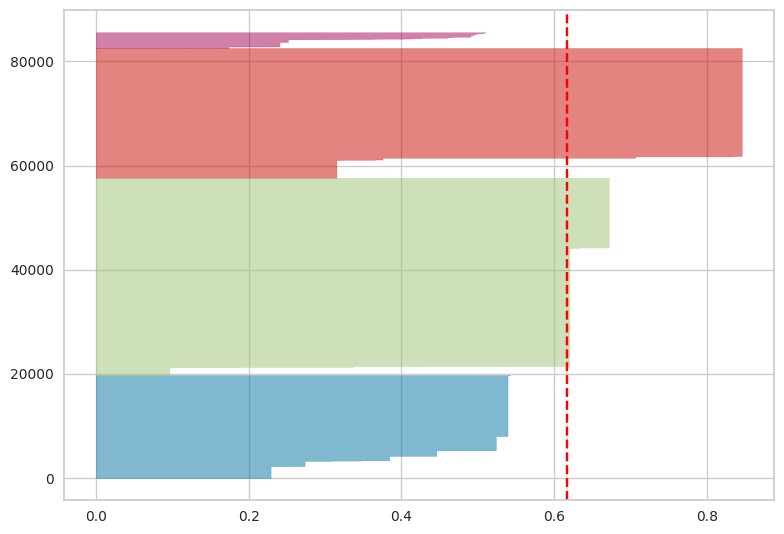

In [132]:
#!pip install yellowbrick

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4, random_state=0)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(ds_cluster_ptpc)
plt.show()

In [86]:
#One hot encoding para variables categoricas
ds_clusters = pd.get_dummies(ds_clusters, columns=["place_l2","place_l3","operation","property_type","property_currency"], drop_first=True)
ds_clusters.head()

,start_date,end_date,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,...,place_l3_Villa Ortuzar,place_l3_Villa Pueyrredón,place_l3_Villa Real,place_l3_Villa Riachuelo,place_l3_Villa Santa Rita,place_l3_Villa Soldati,place_l3_Villa Urquiza,place_l3_Villa del Parque,property_type_Departamento,property_type_PH
1,2021-09-09,2021-09-26,-34.637319,-58.361124,3.0,2.0,58.000000,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO,...,0,0,0,0,0,0,0,0,1,0
2,2021-09-09,2021-09-28,-34.628647,-58.361871,4.0,3.0,70.000000,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur,...,0,0,0,0,0,0,0,0,1,0
3,2021-09-09,2022-01-05,-34.610027,-58.401934,4.0,2.0,127.533018,104.0,146000.0,Venta departamento 4 ambientes Once,...,0,0,0,0,0,0,0,0,1,0
4,2021-09-09,2022-03-09,-34.631621,-58.416825,4.0,2.0,95.590910,73.0,250000.0,PH - Boedo,...,0,0,0,0,0,0,0,0,0,1
5,2021-09-09,2022-01-27,-34.623886,-58.412746,2.0,1.0,61.000000,46.0,100000.0,PH 2 Ambientes c/Patio HECHO A NUEVO,...,0,0,0,0,0,0,0,0,0,1


In [87]:
ds_clusters.shape

(85548, 68)

In [88]:
ds_clusters.drop(['start_date', 'end_date','property_title'], axis=1, inplace = True)

In [89]:
ds_clusters.head()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,place_l3_Agronomía,place_l3_Almagro,place_l3_Balvanera,...,place_l3_Villa Ortuzar,place_l3_Villa Pueyrredón,place_l3_Villa Real,place_l3_Villa Riachuelo,place_l3_Villa Santa Rita,place_l3_Villa Soldati,place_l3_Villa Urquiza,place_l3_Villa del Parque,property_type_Departamento,property_type_PH
1,-34.637319,-58.361124,3.0,2.0,58.000000,55.0,82900.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-34.628647,-58.361871,4.0,3.0,70.000000,70.0,99000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-34.610027,-58.401934,4.0,2.0,127.533018,104.0,146000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-34.631621,-58.416825,4.0,2.0,95.590910,73.0,250000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,-34.623886,-58.412746,2.0,1.0,61.000000,46.0,100000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [90]:
ds_prueba.drop(['start_date', 'end_date','latitud','longitud','property_price','place_l2','place_l3','property_title'], axis=1, inplace = True)

In [91]:
ds_prueba.drop(['operation','property_type','property_currency','property_surface_covered','property_surface_total','property_bedrooms'], axis=1, inplace = True)

In [92]:
ds_prueba.head()

,property_rooms
1,3.0
2,4.0
3,4.0
4,4.0
5,2.0


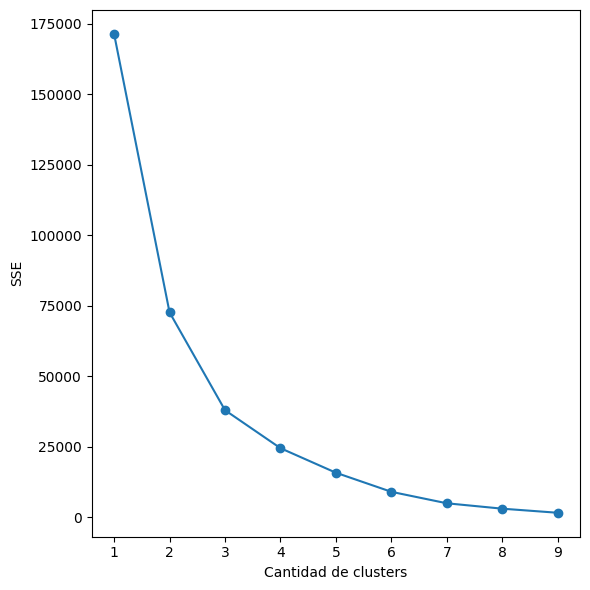

In [93]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_prueba)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

In [94]:
from sklearn.preprocessing import scale, MinMaxScaler

scaler = MinMaxScaler()
df_iris_escalado = scaler.fit_transform(ds_prueba)

In [95]:
kmeans = KMeans(n_clusters=4)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento

kmeans.fit(ds_prueba) #Entrenamos el algoritmo para que aprenda cómo agrupar

y_kmeans = kmeans.predict(ds_prueba)

In [96]:
km = sklearn.cluster.KMeans(n_clusters=2)
km.fit(ds_prueba)

KMeans(n_clusters=2)

In [97]:
label =  km.predict(ds_prueba)
 
list(label)


[1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,


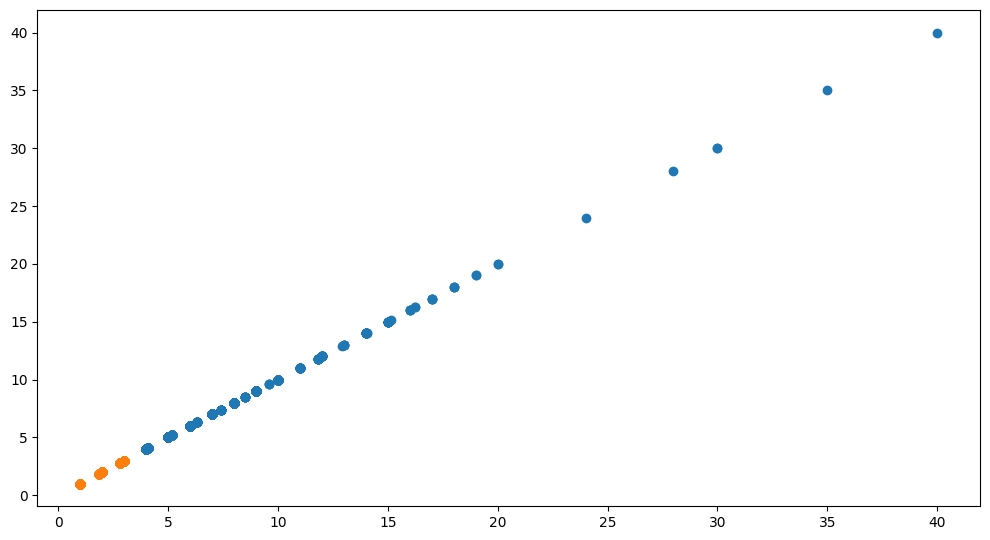

In [98]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = ds_prueba.iloc[label == 0]
filtered_label1 = ds_prueba.iloc[label == 1]

#plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,0])
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,0])
plt.show()




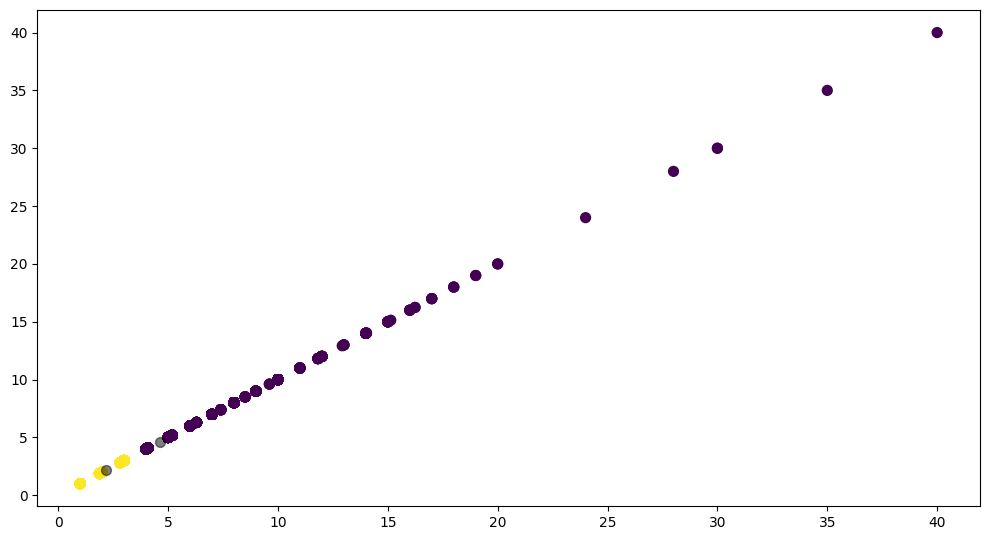

In [99]:
plt.scatter(ds_prueba.iloc[:, 0], ds_prueba.iloc[:, 0], c=label, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 0], c='black', s=200, alpha=0.5,marker='.')
plt.show()

In [100]:
from sklearn.metrics import silhouette_score

list_k = list(range(2, 6))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds_prueba)

    score = silhouette_score (ds_prueba, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.6384335818185511
For n_clusters =3 silhouette score is 0.697015557297093
For n_clusters =4 silhouette score is 0.7635442642456913
For n_clusters =5 silhouette score is 0.9161374481130717


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 KB 17.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


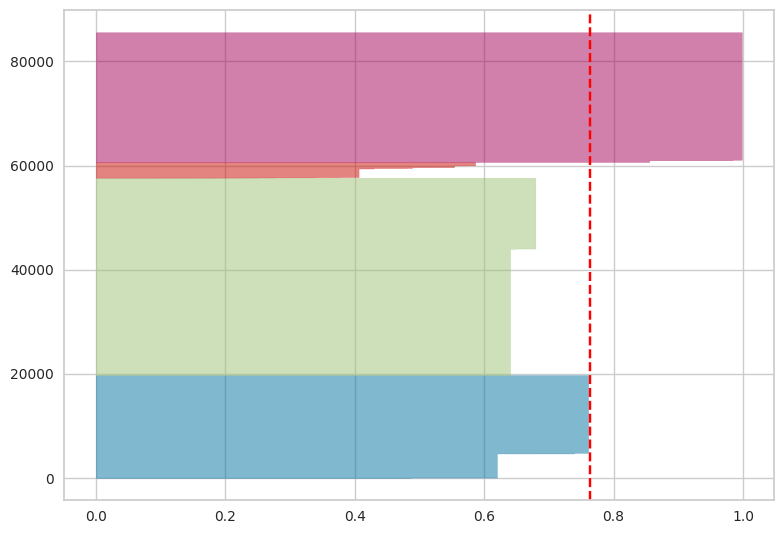

In [101]:
#!pip install yellowbrick

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4, random_state=0)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(ds_prueba)
plt.show()

## 3. Clasificación

### a) Construcción del target

### b) Entrenamiento y Predicción

### Modelo 1 : Árbol de decisión

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7da1cea6-caf2-4c30-b019-068f1fb82c77' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>